In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
import time

# import pyspark

from sklearn.metrics import roc_auc_score

In [3]:
# ls

In [5]:
df = pd.read_csv('dev.csv/part-00000-ee748d50-0c69-46e0-bdfd-03dac1fb4272-c000.csv')

In [6]:
# set options to see the dataframe entirely
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)

In [7]:
df.head(5)

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008

In [8]:
df.shape

(1103628, 191)

In [9]:
df['customer_ID'].nunique()

91633

In [10]:
df = df.sample(frac=0.7, random_state=42) 

In [11]:
df.shape

(772540, 191)

In [12]:
df['customer_ID'].nunique()

91149

In [13]:
# Re Organize the dataframe.
fixed_columns = ['customer_ID', 'S_2', 'target']    # since s_2 is the date column
other_columns = sorted([col for col in df.columns if col not in fixed_columns])

new_column_order = fixed_columns + other_columns
df = df[new_column_order]

In [14]:
from collections import Counter

initial_chars = [col[0] for col in df.columns if col[0].isalpha()]
initial_char_counts = Counter(initial_chars)

initial_char_counts_df = pd.DataFrame(list(initial_char_counts.items()), columns=['Initial_Char', 'Count'])

mapping = {
    'c': 'Customer ID',
    's': 'Spend Variables',
    't': 'Target',
    'B': 'Balance Variables',
    'D': 'Delinquency Variables',
    'P': 'Payment Variables',
    'R': 'Risk Variables',
}

initial_char_counts_df['Description'] = initial_char_counts_df['Initial_Char'].map(lambda x: mapping.get(x, 'Other'))
initial_char_counts_df

,Initial_Char,Count,Description
0,c,1,Customer ID
1,S,22,Other
2,t,1,Target
3,B,40,Balance Variables
4,D,96,Delinquency Variables
5,P,3,Payment Variables
6,R,28,Risk Variables


In [17]:
# !pip install plotly

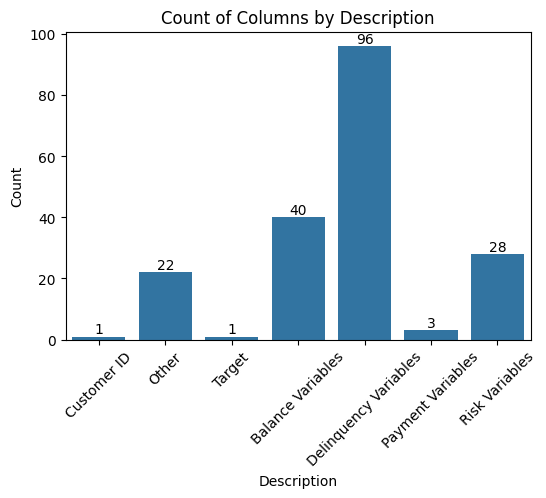

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
initial_char_counts_df 

# Creating the plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Description', y='Count', data=initial_char_counts_df)
plt.xticks(rotation=45)
plt.title('Count of Columns by Description')
plt.xlabel('Description')
plt.ylabel('Count')

# Adding labels to the bars
for index, row in initial_char_counts_df.iterrows():
    plt.annotate(row['Count'], xy=(index, row['Count']), ha='center', va='bottom')

plt.show()


# Customer History Buckets

In [23]:
customer_counts = df['customer_ID'].value_counts()

counts_df = pd.DataFrame(customer_counts).reset_index()
counts_df.columns = ['c_id', 'counts']

# grouping by counts to calculate number of customers
count_summary = counts_df.groupby('counts')['c_id'].nunique().reset_index()

# renaming the columns
count_summary.columns = ['count_bucket', 'num_customers']

total_customers = count_summary['num_customers'].sum()

# Calculate the percentage of total for num_customers
count_summary['percent_of_total'] = (count_summary['num_customers'] / total_customers) * 100

# Show the DataFrame
count_summary

,count_bucket,num_customers,percent_of_total
0,1,1574,1.726843
1,2,1602,1.757562
2,3,1551,1.701609
3,4,1746,1.915545
4,5,2694,2.955600
5,6,5040,5.529408
6,7,9596,10.527817
7,8,15315,16.802159
8,9,19019,20.865835
9,10,17294,18.973329


In [25]:
df['S_2'] = pd.to_datetime(df['S_2'])

# Find the most recent date in the 'S_2' column
most_recent_date = df['S_2'].max()

# Calculate the number of months of historical data for each row
df['months_of_historical_data'] = df['S_2'].apply(lambda x: (most_recent_date.year - x.year) * 12 + (most_recent_date.month - x.month))

# Group the data by the number of months of historical data and calculate the count and default rate for each group
grouped = df.groupby('months_of_historical_data').agg(
    observations=('months_of_historical_data', 'size'),
    default_rate=('target', 'mean')
)

# Convert default rate to percentage
grouped['default_rate'] *= 100

# Reset the index to make 'months_of_historical_data' a column again
grouped.reset_index(inplace=True)

# Sort the dataframe by 'months_of_historical_data' in descending order for display purposes
grouped.sort_values('months_of_historical_data', ascending=True, inplace=True)

# Add a row for 'All Applicants'
all_applicants = pd.DataFrame({
    'months_of_historical_data': ['All Applicants'],
    'observations': [df.shape[0]],
    'default_rate': [df['target'].mean() * 100]
})

# Append the 'All Applicants' row to the top of the DataFrame
grouped = pd.concat([all_applicants, grouped], ignore_index=True)

# Format the 'months_of_historical_data' column for display
grouped['months_of_historical_data'] = grouped['months_of_historical_data'].apply(
    lambda x: f'Applications with {x} months of historical data' if isinstance(x, int) else x
)

# Display or save the table
grouped

,months_of_historical_data,observations,default_rate
0,All Applicants,772540,25.014368
1,Applications with 0 months of historical data,64089,25.976377
2,Applications with 1 months of historical data,63416,25.983979
3,Applications with 2 months of historical data,62355,25.773394
4,Applications with 3 months of historical data,61451,25.709915
5,Applications with 4 months of historical data,60636,25.562372
6,Applications with 5 months of historical data,59876,25.365756
7,Applications with 6 months of historical data,59226,25.228785
8,Applications with 7 months of historical data,58594,25.103253
9,Applications with 8 months of historical data,58104,24.666116


### Dropping Customers with less than 3 months of data

In [27]:
customer_counts = df['customer_ID'].value_counts()

# Filter customer_counts to get IDs of customers who appear 3 times or more
customers_to_keep = customer_counts[customer_counts >= 3].index

# Filter the original DataFrame to keep only rows with these customer IDs
filtered_df = df[df['customer_ID'].isin(customers_to_keep)]



customer_counts = filtered_df['customer_ID'].value_counts()

counts_df = pd.DataFrame(customer_counts).reset_index()
counts_df.columns = ['c_id', 'counts']

# grouping by counts to calculate number of customers
count_summary = counts_df.groupby('counts')['c_id'].nunique().reset_index()

# renaming the columns
count_summary.columns = ['count_bucket', 'num_customers']

# show dataframe
count_summary

,count_bucket,num_customers
0,3,1551
1,4,1746
2,5,2694
3,6,5040
4,7,9596
5,8,15315
6,9,19019
7,10,17294
8,11,10770
9,12,4182


In [28]:
df = filtered_df

# Convert S_2 to datetime

In [29]:
df['S_2'] = pd.to_datetime(df['S_2'])
print(df['S_2'].dtype)

datetime64[ns]


# Missing Value Analysis

In [30]:
# See if there any null values
v1 = df.isnull().sum()
v2 = ((df.isnull().sum()/len(df))*100).round(5)

[f'{percent:.2f}%' for percent in v2]

null_df = pd.DataFrame({'Null Value Count':v1,
                       'Null Value Percent':[f'{percent:.2f}%' for percent in v2]})
null_df.sort_values(by='Null Value Count', ascending=False)

,Null Value Count,Null Value Percent
D_87,767174,99.92%
D_88,766977,99.90%
D_108,763651,99.46%
D_111,763449,99.44%
D_110,763449,99.44%
B_39,763137,99.40%
D_73,759973,98.99%
B_42,757425,98.65%
D_138,739740,96.35%
D_137,739740,96.35%


In [31]:
### Dropping Columns with more than 20% nulls
# Dropping Columns with more than 20% Nulls
# calculate % if missing
# v2 = df.isnull().mean()*100

# # filter out columns with more than 20% nulls
# cols_to_drop = v2[v2>20].index

# # droppping these columns from the dataframe
# df.drop(columns=cols_to_drop, inplace=True)

# # recalculate nulls
# v1 = df.isnull().sum()
# v2 = ((df.isnull().sum()/len(df))*100).round(5)

# [f'{percent:.2f}%' for percent in v2]

# null_df2 = pd.DataFrame({'Null Value Count':v1,
#                        'Null Value Percent':[f'{percent:.2f}%' for percent in v2]})
# null_df2.sort_values(by='Null Value Count', ascending=False)

### Recheck for Missing Values

In [32]:
# # See if there any null values
# v1 = df.isnull().sum()
# v2 = ((df.isnull().sum()/len(df))*100).round(5)

# [f'{percent:.2f}%' for percent in v2]

# null_df = pd.DataFrame({'Null Value Count':v1,
#                        'Null Value Percent':[f'{percent:.2f}%' for percent in v2]})
# null_df.sort_values(by='Null Value Count', ascending=False)

# Imputing Categorical Columns with Mode and Numerical with Mean

In [33]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 
                       'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])
    
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

In [34]:
for col in categorical_columns:
    print(df[col].value_counts())
    print('\n')

B_30
0.0    653606
1.0    106573
2.0      7583
Name: count, dtype: int64


B_38
2.0    272273
3.0    174347
1.0    159901
5.0     62089
4.0     41485
7.0     35239
6.0     22428
Name: count, dtype: int64


D_114
1.0    482721
0.0    285041
Name: count, dtype: int64


D_116
0.0    766895
1.0       867
Name: count, dtype: int64


D_117
-1.0    225881
 3.0    161239
 4.0    158614
 2.0     93755
 5.0     63263
 6.0     48314
 1.0     16696
Name: count, dtype: int64


D_120
0.0    680865
1.0     86897
Name: count, dtype: int64


D_126
 1.0    608319
 0.0    122394
-1.0     37049
Name: count, dtype: int64


D_63
CO    572746
CR    128750
CL     60596
XZ      3388
XM      1287
XL       995
Name: count, dtype: int64


D_64
O     431797
U     213302
R     117473
-1      5190
Name: count, dtype: int64


D_66
1.0    766935
0.0       827
Name: count, dtype: int64


D_68
6.0    413529
5.0    168788
4.0     67194
3.0     66739
2.0     30538
1.0     18811
0.0      2163
Name: count, dtype: int64




### Categorical Data Encoding

In [35]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']
cat_df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode, dtype=int)

In [36]:
new_columns = [col for col in cat_df_encoded.columns if col not in df.columns]

print(new_columns)

['B_30_0.0', 'B_30_1.0', 'B_30_2.0', 'B_38_1.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_0.0', 'D_114_1.0', 'D_116_0.0', 'D_116_1.0', 'D_117_-1.0', 'D_117_1.0', 'D_117_2.0', 'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_0.0', 'D_120_1.0', 'D_126_-1.0', 'D_126_0.0', 'D_126_1.0', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0']


In [37]:
df2 = cat_df_encoded

In [38]:
df2.head()

,customer_ID,S_2,target,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_2,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_29,B_3,B_31,B_32,B_33,B_36,B_37,B_39,B_4,B_40,B_41,B_42,B_5,B_6,B_7,B_8,B_9,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_115,D_118,D_119,D_121,D_122,D_123,D_124,D_125,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_65,D_66,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,P_2,P_3,P_4,R_1,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_2,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28,R_3,R_4,R_5,R_6,R_7,R_8,R_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27,S_3,S_5,S_6,S_7,S_8,S_9,months_of_historical_data,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,D_114_0.0,D_114_1.0,D_116_0.0,D_116_1.0,D_117_-1.0,D_117_1.0,D_117_2.0,D_117_3.0,D_117_4.0,D_117_5.0,D_117_6.0,D_120_0.0,D_120_1.0,D_126_-1.0,D_126_0.0,D_126_1.0,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
1001678,e82426907e83eff6314d6932387e05980260b6a504a859378e40f6148de77e9b,2018-01-30,0,0.092478,0.024581,0.063496,0.006179,0.023176,0.022227,0.009837,0.758565,0.932517,0.287218,0.121374,0.222187,0.118112,0.007755,0.006110,0.273957,0.004579,0.039733,0.000247,0.002718,0.102830,0.005099,0.065400,1,0.009412,0.001723,0.000011,0.088204,0.14597,0.278010,0.310617,0.002795,0.022975,0.012549,0.021231,0.320102,1.000424,0.516240,0.424792,1.008174,0.960303,0.497643,0.136416,0.674171,0.005392,0.001766,0.891639,1.003717,1.007348,0.208180,0.037980,0.042318,0.033467,0.082271,0.294749,0.009710,0.006331,0.001693,0.009782,0.009530,0.004320,0.006810,0.000972,0.16179,0.008678,0.211991,0.005103,0.253976,0.005023,0.006987,0.002402,0.004553,0.002616,0.378180,0.004751,0.002337,0.007682,0.685093,0.006109,0.12183,0.116663,0.504001,0.047147,0.538970,0.080949,0.815861,0.13003,0.109446,0.008428,0.045970,0.013349,1.008537,0.548011,0.149113,0.505297,0.468230,0.092569,0.831179,0.022596,0.008995,1.0,0.005642,0.251570,0.013525,0.337655,0.102926,0.288860,0.334192,0.05855,0.205999,0.007066,0.006606,0.004961,0.005136,0.009484,0.005704,0.004489,0.004797,1.0,0.081778,0.006549,0.004516,0.001358,0.009264,0.001387,0.000945,0.423450,0.696847,0.009930,0.006237,0.004581,0.008294,1.000849,0.002636,0.001108,0.001155,0.000026,0.002033,0.004208,0.005400,0.007020,0.004571,0.001855,0.003639,0.003954,0.008042,0.001306,0.03644,1.009312,0.002486,0.201494,0.007820,0.000448,0.005406,0.007668,0.001542,0.172798,0.446841,0.190555,0.005894,0.801286,0.004133,0.003098,0.006537,0.002140,0.004594,0.949931,0.140650,0.963861,0.971872,0.009365,0.004759,0.415000,0.029318,0.001722,0.345205,0.108934,0.019381,2,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
698107,a1ece17ade53583a522f0fec8c7e8c79085a24c9377bba1ff4fdce232b4da214,2017-08-30,1,0.069503,0.101049,0.070815,0.626662,0.365552,0.785919,0.922997,1.004107,0.915636,0.134597,0.086449,0.300279,1.007248,0.002313,0.503756,0.063787,0.958598,0.007392,0.009718,0.001148,0.397575,0.001723,0.430102,1,0.002739,0.008025,0.003982,0.063742,0.14597,0.174456,0.055480,0.007250,0.022975,0.001694,0.069223,0.063528,1.004163,0.007677,0.122184,1.004207,0.950343,0.071197,0.136416,0.339161,0.005392,0.001980,0.891639,1.003717,0.006020,0.200886,0.119490,0.114635,0.113965,0.399811,0.292976,0.008145,0.368086,0.002370,0.009576,0.004705,0.001926,0.007697,0.006051,0.16179,0.007495,0.211991,0.005103,0.253976,0.005023,0.006987,0.003982,0.009797,0.002361,0.378180,0.005402,0.004501,0.006795,0.800477,0.641640,0.12183,0.096170,0.125717,0.106280,0.481777,0.573031,0.046104,0.13003,0.109446,0.002313,0.481761,0.010404,1.003439,0

# Feature Engineering

In [39]:
df2['S_2'] = pd.to_datetime(df2['S_2'])
end_date = df2['S_2'].max()

# Date ranges
last_3_months = end_date - pd.DateOffset(months=3)
last_6_months = end_date - pd.DateOffset(months=6)
last_9_months = end_date - pd.DateOffset(months=9)
last_12_months = end_date - pd.DateOffset(months=12)

# Exclusion categorical columns
exclusion_list = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'S_2']
columns_to_include = [col for col in df2.columns if not col.startswith(tuple(exclusion_list))]

# New features
df2['S_Total'] = df2[columns_to_include].filter(like='S_').sum(axis=1)
df2['P_Total'] = df2[columns_to_include].filter(like='P_').sum(axis=1)
df2['B_Total'] = df2[columns_to_include].filter(like='B_').sum(axis=1)
df2['R_Total'] = df2[columns_to_include].filter(like='R_').sum(axis=1)

df2['D_Ave'] = df2[columns_to_include].filter(like='D_').mean(axis=1)
df2['S_Ave'] = df2[columns_to_include].filter(like='S_').mean(axis=1)
df2['P_Ave'] = df2[columns_to_include].filter(like='P_').mean(axis=1)
df2['B_Ave'] = df2[columns_to_include].filter(like='B_').mean(axis=1)
df2['R_Ave'] = df2[columns_to_include].filter(like='R_').mean(axis=1)

df2['D_Ave'] = df2[columns_to_include].filter(like='D_').mean(axis=1)
df2['S_Ave'] = df2[columns_to_include].filter(like='S_').mean(axis=1)
df2['P_Ave'] = df2[columns_to_include].filter(like='P_').mean(axis=1)
df2['B_Ave'] = df2[columns_to_include].filter(like='B_').mean(axis=1)
df2['R_Ave'] = df2[columns_to_include].filter(like='R_').mean(axis=1)


df2['S_Ave_3_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['S_Ave_6_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['S_Ave_9_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['S_Ave_12_months'] = df2[columns_to_include].filter(like='S_').loc[df2['S_2'] >= last_12_months].mean(axis=1)

df2['P_Ave_3_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['P_Ave_6_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['P_Ave_9_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['P_Ave_12_months'] = df2[columns_to_include].filter(like='P_').loc[df2['S_2'] >= last_12_months].mean(axis=1)

df2['R_Ave_3_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['R_Ave_6_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['R_Ave_9_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['R_Ave_12_months'] = df2[columns_to_include].filter(like='R_').loc[df2['S_2'] >= last_12_months].mean(axis=1)

df2['B_Ave_3_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['B_Ave_6_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['B_Ave_9_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['B_Ave_12_months'] = df2[columns_to_include].filter(like='B_').loc[df2['S_2'] >= last_12_months].mean(axis=1)

df2['D_Ave_3_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_3_months].mean(axis=1)
df2['D_Ave_6_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_6_months].mean(axis=1)
df2['D_Ave_9_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_9_months].mean(axis=1)
df2['D_Ave_12_months'] = df2[columns_to_include].filter(like='D_').loc[df2['S_2'] >= last_12_months].mean(axis=1)

In [40]:
print(list(df2.columns))

['customer_ID', 'S_2', 'target', 'B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_2', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_3', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_39', 'B_4', 'B_40', 'B_41', 'B_42', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145', 'D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_65', 'D_66', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75', 'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', '

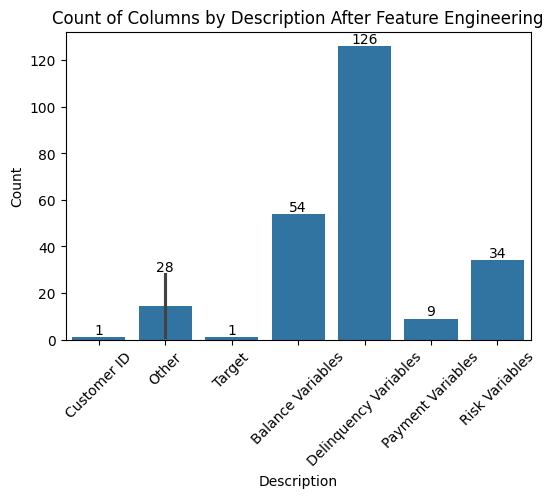

In [45]:
from collections import Counter

initial_chars = [col[0] for col in df2.columns if col[0].isalpha()]
initial_char_counts = Counter(initial_chars)

initial_char_counts_df2 = pd.DataFrame(list(initial_char_counts.items()), columns=['Initial_Char', 'Count'])

mapping = {
    'c': 'Customer ID',
    's': 'Spend Variables',
    't': 'Target',
    'B': 'Balance Variables',
    'D': 'Delinquency Variables',
    'P': 'Payment Variables',
    'R': 'Risk Variables',
}

initial_char_counts_df2['Description'] = initial_char_counts_df['Initial_Char'].map(lambda x: mapping.get(x, 'Other'))
initial_char_counts_df2


import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
initial_char_counts_df 

# Creating the plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Description', y='Count', data=initial_char_counts_df2)
plt.xticks(rotation=45)
plt.title('Count of Columns by Description After Feature Engineering')
plt.xlabel('Description')
plt.ylabel('Count')

# Adding labels to the bars
for index, row in initial_char_counts_df2.iterrows():
    plt.annotate(row['Count'], xy=(index, row['Count']), ha='center', va='bottom')

plt.show()

# Split the DataFrame

In [46]:
X = df2.drop(['customer_ID', 'target', 'S_2'], axis=1)
y = df2['target']

from sklearn.model_selection import train_test_split

# split 1
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# split 2
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=59)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test1.shape)
print(y_test1.shape)
print(X_test2.shape)
print(y_test2.shape)

(537433, 251)
(537433,)
(115164, 251)
(115164,)
(115165, 251)
(115165,)


In [48]:
# X_train.to_csv('X_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)

# X_test1.to_csv('X_test1.csv', index=False)
# y_test1.to_csv('y_test1.csv', index=False)

# X_test2.to_csv('X_test2.csv', index=False)
# y_test2.to_csv('y_test2.csv', index=False)

# XGBoost Model 1

In [51]:
# !pip install xgboost

In [52]:
from xgboost import XGBClassifier

xgb_m1 = XGBClassifier(random_state=1, use_label_encoder=False, seed=69)
xgb_m1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [53]:
# Get feature importances
feature_importances = xgb_m1.feature_importances_

# Print feature importance for features with importance > 0.5%
print("Features with importance higher than 0.5%:")
for feature_name, importance in zip(X_train.columns, feature_importances):
    if importance > 0.005:
        print(f'Feature: {feature_name}, Importance: {importance}')

Features with importance higher than 0.5%:
Feature: B_1, Importance: 0.05282055586576462
Feature: B_10, Importance: 0.0052454727701842785
Feature: B_2, Importance: 0.021400704979896545
Feature: B_3, Importance: 0.010972771793603897
Feature: B_4, Importance: 0.00514361634850502
Feature: B_5, Importance: 0.005230071023106575
Feature: B_7, Importance: 0.011283536441624165
Feature: B_9, Importance: 0.02673555538058281
Feature: D_112, Importance: 0.005831691436469555
Feature: D_129, Importance: 0.005142501555383205
Feature: D_41, Importance: 0.008670881390571594
Feature: D_42, Importance: 0.01858876459300518
Feature: D_43, Importance: 0.0068152351304888725
Feature: D_44, Importance: 0.005606759339570999
Feature: D_45, Importance: 0.00848251674324274
Feature: D_46, Importance: 0.007401603739708662
Feature: D_48, Importance: 0.010678671300411224
Feature: D_51, Importance: 0.011892665177583694
Feature: D_75, Importance: 0.007736000698059797
Feature: D_79, Importance: 0.006356335710734129
Featu

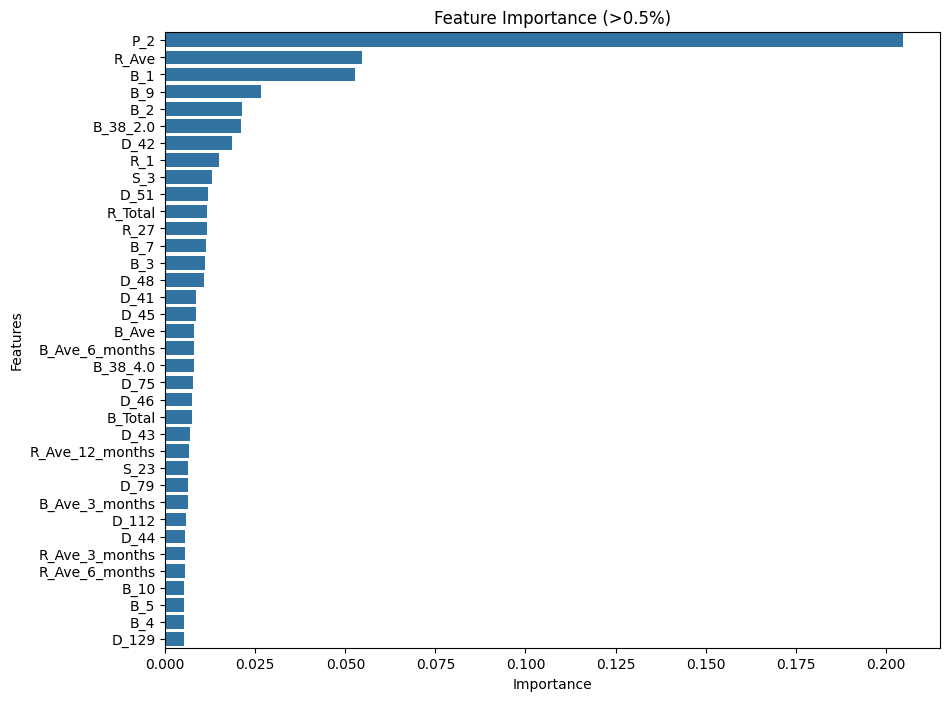

In [54]:
feature_importances = xgb_m1.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Filter the DataFrame for features with importance > 0.5%
important_features_df = feature_importance_df[feature_importance_df['Importance'] > 0.005]

# Sort the DataFrame based on the importance in descending order
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

# print("Features with importance higher than 0.5%:")
# print(important_features_df)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.barplot(x='Importance', y='Feature', data=important_features_df.sort_values('Importance', ascending=False))

plt.title('Feature Importance (>0.5%)')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

In [55]:
important_features_1 = []

for feature_name, importance in zip(X_train.columns, feature_importances):
    if importance > 0.005:  # Check if feature importance is greater than 0.5%
        important_features_1.append(feature_name)

print("Important features:", important_features_1)

Important features: ['B_1', 'B_10', 'B_2', 'B_3', 'B_4', 'B_5', 'B_7', 'B_9', 'D_112', 'D_129', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_48', 'D_51', 'D_75', 'D_79', 'P_2', 'R_1', 'R_27', 'S_23', 'S_3', 'B_38_2.0', 'B_38_4.0', 'B_Total', 'R_Total', 'B_Ave', 'R_Ave', 'R_Ave_3_months', 'R_Ave_6_months', 'R_Ave_12_months', 'B_Ave_3_months', 'B_Ave_6_months']


# XGBoost Model 2

In [56]:
xgb_m2 = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.5,
    max_depth = 4,
    subsample=0.5,  # Use 50% of observations to build each tree
    colsample_bytree=0.5,  # Use 50% of features to build each tree
    scale_pos_weight=5,  # Assign a weight of 5 to default observations
    eval_metric='logloss',
    use_label_encoder=False,
    seed=42
)

xgb_m2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [57]:
# Get feature importances
feature_importances_2 = xgb_m2.feature_importances_

# Print feature importance for features with importance > 0.5%
print("Features with importance higher than 0.5%:")
for feature_name, importance in zip(X_train.columns, feature_importances_2):
    if importance > 0.005:
        print(f'Feature: {feature_name}, Importance: {importance}')

Features with importance higher than 0.5%:
Feature: B_1, Importance: 0.04456305131316185
Feature: B_3, Importance: 0.013181823305785656
Feature: B_4, Importance: 0.006096227094531059
Feature: B_6, Importance: 0.019492462277412415
Feature: B_7, Importance: 0.010771561414003372
Feature: B_9, Importance: 0.01854836195707321
Feature: D_41, Importance: 0.0078256381675601
Feature: D_42, Importance: 0.021749375388026237
Feature: D_43, Importance: 0.007460571825504303
Feature: D_45, Importance: 0.008717681281268597
Feature: D_48, Importance: 0.06500488519668579
Feature: D_49, Importance: 0.00742954108864069
Feature: D_51, Importance: 0.00873642973601818
Feature: D_56, Importance: 0.006366581190377474
Feature: D_79, Importance: 0.006378216668963432
Feature: P_2, Importance: 0.1412792205810547
Feature: R_1, Importance: 0.015822449699044228
Feature: R_26, Importance: 0.011541186831891537
Feature: R_27, Importance: 0.006432440131902695
Feature: S_3, Importance: 0.02737192064523697
Feature: B_38_4.

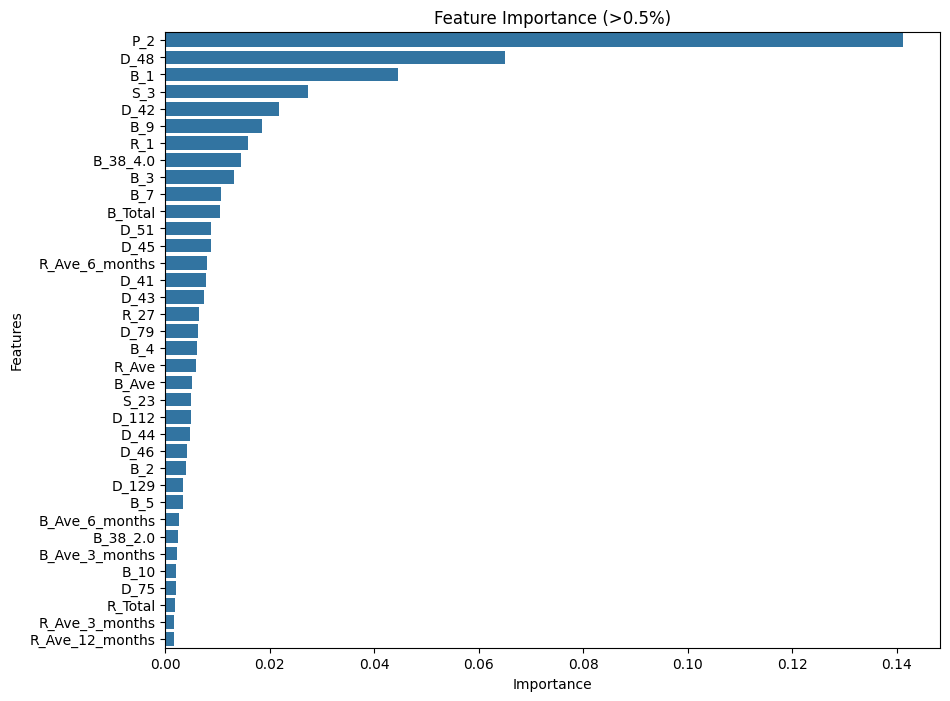

In [58]:
feature_importances_2 = xgb_m2.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df_2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_2
})

# Filter the DataFrame for features with importance > 0.5%
important_features_df_2 = feature_importance_df_2[feature_importance_df['Importance'] > 0.005]

# Sort the DataFrame based on the importance in descending order
important_features_df_2 = important_features_df_2.sort_values(by='Importance', ascending=False)

# print("Features with importance higher than 0.5%:")
# print(important_features_df_2)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.barplot(x='Importance', y='Feature', data=important_features_df_2.sort_values('Importance', ascending=False))

plt.title('Feature Importance (>0.5%)')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

In [59]:
important_features_2 = []

for feature_name, importance in zip(X_train.columns, feature_importances_2):
    if importance > 0.005:  # Check if feature importance is greater than 0.5%
        important_features_2.append(feature_name)

print("Important features:", important_features_2)

Important features: ['B_1', 'B_3', 'B_4', 'B_6', 'B_7', 'B_9', 'D_41', 'D_42', 'D_43', 'D_45', 'D_48', 'D_49', 'D_51', 'D_56', 'D_79', 'P_2', 'R_1', 'R_26', 'R_27', 'S_3', 'B_38_4.0', 'D_63_CO', 'D_63_XM', 'B_Total', 'B_Ave', 'R_Ave', 'R_Ave_6_months']


### Consolidate Most Important Features from Both the Models

In [60]:
print(important_features_1)
print('\n')
print(important_features_2)
print('\n')


# get a consolidated list of all these features:
unique_elements = set(important_features_1).union(set(important_features_2))

features = list(unique_elements)

print(features)

['B_1', 'B_10', 'B_2', 'B_3', 'B_4', 'B_5', 'B_7', 'B_9', 'D_112', 'D_129', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_48', 'D_51', 'D_75', 'D_79', 'P_2', 'R_1', 'R_27', 'S_23', 'S_3', 'B_38_2.0', 'B_38_4.0', 'B_Total', 'R_Total', 'B_Ave', 'R_Ave', 'R_Ave_3_months', 'R_Ave_6_months', 'R_Ave_12_months', 'B_Ave_3_months', 'B_Ave_6_months']


['B_1', 'B_3', 'B_4', 'B_6', 'B_7', 'B_9', 'D_41', 'D_42', 'D_43', 'D_45', 'D_48', 'D_49', 'D_51', 'D_56', 'D_79', 'P_2', 'R_1', 'R_26', 'R_27', 'S_3', 'B_38_4.0', 'D_63_CO', 'D_63_XM', 'B_Total', 'B_Ave', 'R_Ave', 'R_Ave_6_months']


['D_46', 'R_Ave', 'D_63_CO', 'D_63_XM', 'B_38_4.0', 'D_79', 'B_Ave', 'B_Total', 'B_6', 'S_23', 'D_112', 'B_7', 'B_Ave_6_months', 'B_5', 'R_Total', 'D_56', 'S_3', 'R_Ave_3_months', 'D_43', 'R_Ave_6_months', 'D_44', 'B_1', 'D_41', 'D_75', 'B_2', 'P_2', 'D_42', 'D_51', 'B_38_2.0', 'B_4', 'D_129', 'D_48', 'D_45', 'B_9', 'B_10', 'R_27', 'R_26', 'D_49', 'R_1', 'R_Ave_12_months', 'B_3', 'B_Ave_3_months']


In [61]:
columns_to_include = ["customer_ID", "target", "S_2"] + features

# Create df3 by selecting the specified columns from df2
df3 = df2[columns_to_include]

# Recreate Training and Testing Data to Include Only the above Features

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

X = df3.drop(['customer_ID','S_2','target'], axis=1)
y = df3['target']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test1.shape)
print(y_test1.shape)
print(X_test2.shape)
print(y_test2.shape)

(537433, 42)
(537433,)
(115164, 42)
(115164,)
(115165, 42)
(115165,)


# XGBoost GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],  # % of obs each tree
    'colsample_bytree': [0.5, 1.0],  # % of features each tree
    'scale_pos_weight': [1, 5, 10]  # Weight of default observations
}

xgb_clf = XGBClassifier(use_label_encoder=False, seed=4)

grid_search_xgb = GridSearchCV(estimator=xgb_clf, 
                               param_grid=param_grid, 
                               scoring='roc_auc', 
                               cv=3, verbose=3)
grid_search_xgb.fit(X_train, y_train)

# best_model = grid_search_xgb.best_estimator_yes

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.926 total time=   3.1s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.927 total time=   2.9s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.5;, score=0.928 total time=   2.9s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.8;, score=0.926 total time=   2.8s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.8;, score=0.927 total time=   2.7s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=1, subsample=0.8;, score=0.928 total time=   2.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, n_estimators=50, scale_pos_weight=5, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc', verbose=3)

In [67]:
from sklearn.metrics import roc_auc_score
import pandas as pd
from xgboost import XGBClassifier

# Initialize an empty DataFrame to store results
results_df_xgb = pd.DataFrame(columns=['n_estimators', 'learning_rate', 'Subsample %', 'Features',
                                       '% Weight of Default', 'AUC Train', 'AUC Test 1',
                                       'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search_xgb.cv_results_['params']):
    
    # Initialize the model with current parameters
    model = XGBClassifier(use_label_encoder=False, seed=4, **params)
    
    # Fit the model with the current parameter combination
    model.fit(X_train, y_train)  # Ensure to include eval_metric to avoid warnings
    
    # Predict probabilities for each set
    train_pred = model.predict_proba(X_train)[:, 1]
    test1_pred = model.predict_proba(X_test1)[:, 1]
    test2_pred = model.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame with the results
    temp_df = pd.DataFrame({
        'n_estimators': [params.get('n_estimators', 'Not specified')],
        'learning_rate': [params.get('learning_rate', 'Not specified')],
        'Subsample %': [f"{params.get('subsample', 0) * 100}%"],
        'Features': [f"{params.get('colsample_bytree', 0) * 100}%"],
        '% Weight of Default': [params.get('scale_pos_weight', 'Not specified')],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Append the temporary DataFrame to the main results DataFrame
    results_df_xgb = pd.concat([results_df_xgb, temp_df], ignore_index=True)

# # Optionally, save the results to a CSV file
results_df_xgb.to_csv('grid_search_results_xgb.csv', index=False)

# Display the first few rows of the results DataFrame
results_df_xgb.head()

C:\Users\anmol\AppData\Local\Temp\ipykernel_14772\2378702306.py:42: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,n_estimators,learning_rate,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.928480,0.928366,0.926433
1,50,0.01,80.0%,50.0%,1,0.928509,0.928320,0.926355
2,50,0.01,50.0%,50.0%,5,0.926994,0.926905,0.925222
3,50,0.01,80.0%,50.0%,5,0.926984,0.926903,0.925197
4,50,0.01,50.0%,50.0%,10,0.926260,0.925961,0.924331


In [68]:
results_df_xgb

,n_estimators,learning_rate,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.928480,0.928366,0.926433
1,50,0.01,80.0%,50.0%,1,0.928509,0.928320,0.926355
2,50,0.01,50.0%,50.0%,5,0.926994,0.926905,0.925222
3,50,0.01,80.0%,50.0%,5,0.926984,0.926903,0.925197
4,50,0.01,50.0%,50.0%,10,0.926260,0.925961,0.924331
5,50,0.01,80.0%,50.0%,10,0.926304,0.925973,0.924336
6,100,0.01,50.0%,50.0%,1,0.930428,0.930296,0.928356
7,100,0.01,80.0%,50.0%,1,0.930463,0.930206,0.928302
8,100,0.01,50.0%,50.0%,5,0.929016,0.928832,0.927129
9,100,0.01,80.0%,50.0%,5,0.929089,0.928848,0.927155


In [69]:
# calculate the mean auc
results_df_xgb['Average AUC'] = results_df_xgb[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)

# calculate
results_df_xgb['Std AUC'] = results_df_xgb[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

results_df_xgb
# results_df_xgb.iloc[:, 5:]

,n_estimators,learning_rate,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2,Average AUC,Std AUC
0,50,0.01,50.0%,50.0%,1,0.928480,0.928366,0.926433,0.927760,0.001151
1,50,0.01,80.0%,50.0%,1,0.928509,0.928320,0.926355,0.927728,0.001193
2,50,0.01,50.0%,50.0%,5,0.926994,0.926905,0.925222,0.926374,0.000998
3,50,0.01,80.0%,50.0%,5,0.926984,0.926903,0.925197,0.926361,0.001009
4,50,0.01,50.0%,50.0%,10,0.926260,0.925961,0.924331,0.925518,0.001039
5,50,0.01,80.0%,50.0%,10,0.926304,0.925973,0.924336,0.925538,0.001054
6,100,0.01,50.0%,50.0%,1,0.930428,0.930296,0.928356,0.929693,0.001160
7,100,0.01,80.0%,50.0%,1,0.930463,0.930206,0.928302,0.929657,0.001181
8,100,0.01,50.0%,50.0%,5,0.929016,0.928832,0.927129,0.928326,0.001041
9,100,0.01,80.0%,50.0%,5,0.929089,0.928848,0.927155,0.928364,0.001054


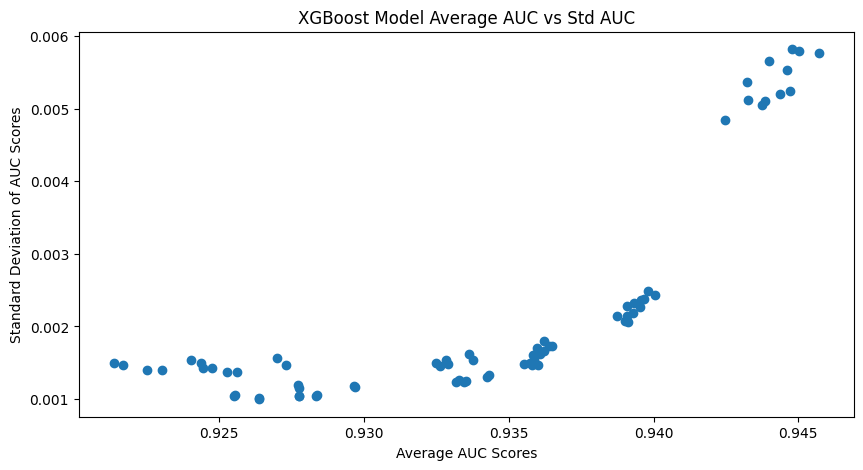

In [70]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_xgb['Average AUC'], results_df_xgb['Std AUC'])
xlab = 'Average AUC Scores'
ylab = 'Standard Deviation of AUC Scores'
title = 'XGBoost Model Average AUC vs Std AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

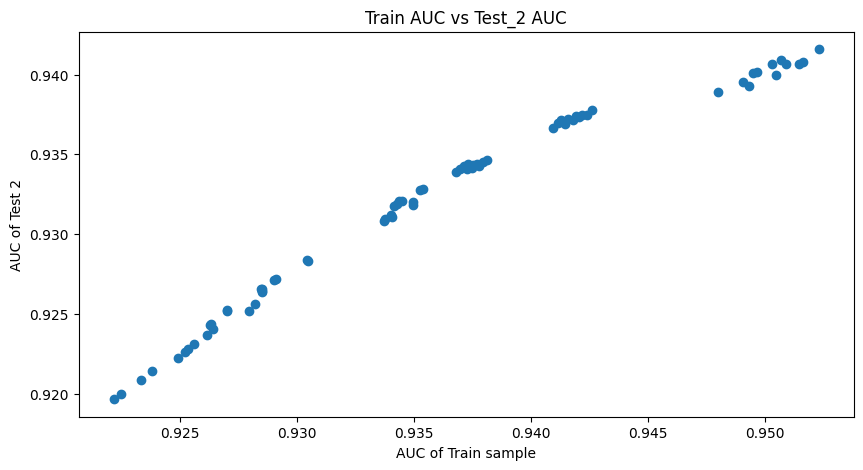

In [71]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_xgb['AUC Train'], results_df_xgb['AUC Test 2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'Train AUC vs Test_2 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

# Best XGB Model Based on Bias and Variance

In [72]:
# Calculate the absolute difference between 'AUC Train' and 'AUC Test 1'
results_df_xgb['AUC Diff'] = abs(results_df_xgb['AUC Train'] - results_df_xgb['AUC Test 1'])

# Find the minimum difference to identify the models with the closest train and test performance
min_diff = results_df_xgb['AUC Diff'].min()

# Filter the DataFrame to rows that match the minimum difference
min_diff_rows = results_df_xgb[results_df_xgb['AUC Diff'] == min_diff]

# From those rows, find the one with the highest 'AUC Test 2'
highest_test_auc_index = min_diff_rows['AUC Test 2'].idxmax()

# Select the best row based on the criteria
best_model_xgb = results_df_xgb.loc[highest_test_auc_index]

print("Row with the highest 'AUC Test 2' and smallest difference between 'AUC Train' and 'AUC Test 2':")
print(best_model_xgb)

Row with the highest 'AUC Test 2' and smallest difference between 'AUC Train' and 'AUC Test 2':
n_estimators                100
learning_rate              0.01
Subsample %               50.0%
Features                 100.0%
% Weight of Default           5
AUC Train              0.926406
AUC Test 1             0.926417
AUC Test 2             0.924029
Average AUC            0.925617
Std AUC                0.001376
AUC Diff               0.000011
Name: 44, dtype: object


In [73]:
best_xgb_model_params = {
    'n_estimators': best_model_xgb['n_estimators'],
    'learning_rate': best_model_xgb['learning_rate'],
    'subsample': float(best_model_xgb['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(best_model_xgb['Features'][:-1]) / 100.0,
    'scale_pos_weight': best_model_xgb['% Weight of Default']
}

In [74]:
xgb_final = XGBClassifier(**best_xgb_model_params)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
print(xgb_final.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 5, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [76]:
# Get feature importances
feature_importances_3 = xgb_final.feature_importances_

# Print feature importance for features with importance > 0.5%
print("Features with importance higher than 0.5%:")
for feature_name, importance in zip(X_train.columns, feature_importances_3):
    if importance > 0.005:
        print(f'Feature: {feature_name}, Importance: {importance}')

Features with importance higher than 0.5%:
Feature: D_79, Importance: 0.006631569936871529
Feature: B_Ave, Importance: 0.0067915176041424274
Feature: B_Total, Importance: 0.010835224762558937
Feature: B_6, Importance: 0.007943940348923206
Feature: D_112, Importance: 0.005665401462465525
Feature: B_7, Importance: 0.03987718001008034
Feature: B_Ave_6_months, Importance: 0.005046563223004341
Feature: R_Total, Importance: 0.005086273420602083
Feature: S_3, Importance: 0.010815080255270004
Feature: D_44, Importance: 0.012088283896446228
Feature: B_1, Importance: 0.1394776850938797
Feature: D_75, Importance: 0.022372489795088768
Feature: B_2, Importance: 0.014951620250940323
Feature: P_2, Importance: 0.4424089193344116
Feature: D_42, Importance: 0.01892969012260437
Feature: B_38_2.0, Importance: 0.008987757377326488
Feature: B_4, Importance: 0.0071145519614219666
Feature: D_48, Importance: 0.038511913269758224
Feature: D_45, Importance: 0.01693442091345787
Feature: B_9, Importance: 0.0611715

<Figure size 1500x2000 with 0 Axes>

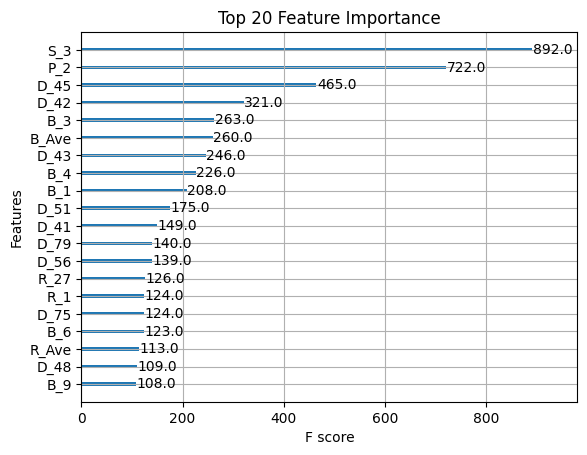

In [77]:
# Plotting Top 10 features
from xgboost import plot_importance

plt.figure(figsize=(15, 20))
plot_importance(xgb_final, max_num_features=20)
plt.title('Top 20 Feature Importance')
plt.show()

# Model Performance Functions

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

def model_performance(model_name,
                      X_train_data,
                      y_train_data, 
                      X_test_data1,
                      y_test_data1,
                      X_test_data2,
                      y_test_data2): 

    train_preds = model_name.predict(X_train_data)
    test_preds1= model_name.predict(X_test_data1)
    test_preds2 = model_name.predict(X_test_data2)

    
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data1, test_preds1)
    e = classification_report(y_test_data2, test_preds2)
    
    c = round(model_name.score(X_train_data, y_train_data),4)
    d = round(model_name.score(X_test_data1, y_test_data1),4)
    f = round(model_name.score(X_test_data2, y_test_data2),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data 1')
    print(b)
    print('\n')
    print('classification report for testing data 2')
    print(e)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data 1 is ',d)
    print('the model score for testing data 2 is ',f)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=3)
    fig.set_size_inches(20,5)

    plt.subplot(1,3,1)
    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    
    
    plt.subplot(1,3,2) 
    sns.heatmap(confusion_matrix(y_test_data1, test_preds1), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data 1')


    plt.subplot(1,3,3) 
    sns.heatmap(confusion_matrix(y_test_data2, test_preds2), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data 2')

In [79]:
# ROC AUC Plots
def roc_score_auc_curve(model_name,
                      X_train_data,
                      y_train_data, 
                      X_test_data1,
                      y_test_data1,
                      X_test_data2,
                      y_test_data2):
    
    train_preds = model_name.predict(X_train_data)
    test_preds1= model_name.predict(X_test_data1)

    
    a = round(roc_auc_score(y_train_data, model_name.predict_proba(X_train_data)[:,1]),4)
    b = round(roc_auc_score(y_test_data1, model_name.predict_proba(X_test_data1)[:,1]),4)
    c = round(roc_auc_score(y_test_data2, model_name.predict_proba(X_test_data2)[:,1]),4)
    
    print('AUC Score for Model on Training Data is',a)
    print('AUC Score for Model on Testing Data 1 is',b)
    print('AUC Score for Model on Testing Data 2 is',c)
    
    
    plt.figure(figsize=(12,7))
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_data, model_name.predict_proba(X_train_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(train_fpr, train_tpr, marker='.') 
  

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_data1, model_name.predict_proba(X_test_data1)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr, test_tpr, marker='o') 


    test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test_data2, model_name.predict_proba(X_test_data2)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr2, test_tpr2, marker='o')
    

## Final XGBoost Model's Performance

classification report for training data
              precision    recall  f1-score   support

           0       0.98      0.74      0.84    403583
           1       0.55      0.95      0.70    133850

    accuracy                           0.79    537433
   macro avg       0.76      0.85      0.77    537433
weighted avg       0.87      0.79      0.81    537433



classification report for testing data 1
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     86376
           1       0.55      0.95      0.70     28788

    accuracy                           0.79    115164
   macro avg       0.76      0.85      0.77    115164
weighted avg       0.87      0.79      0.81    115164



classification report for testing data 2
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     86273
           1       0.55      0.95      0.70     28892

    accuracy                           0.79    115165
  

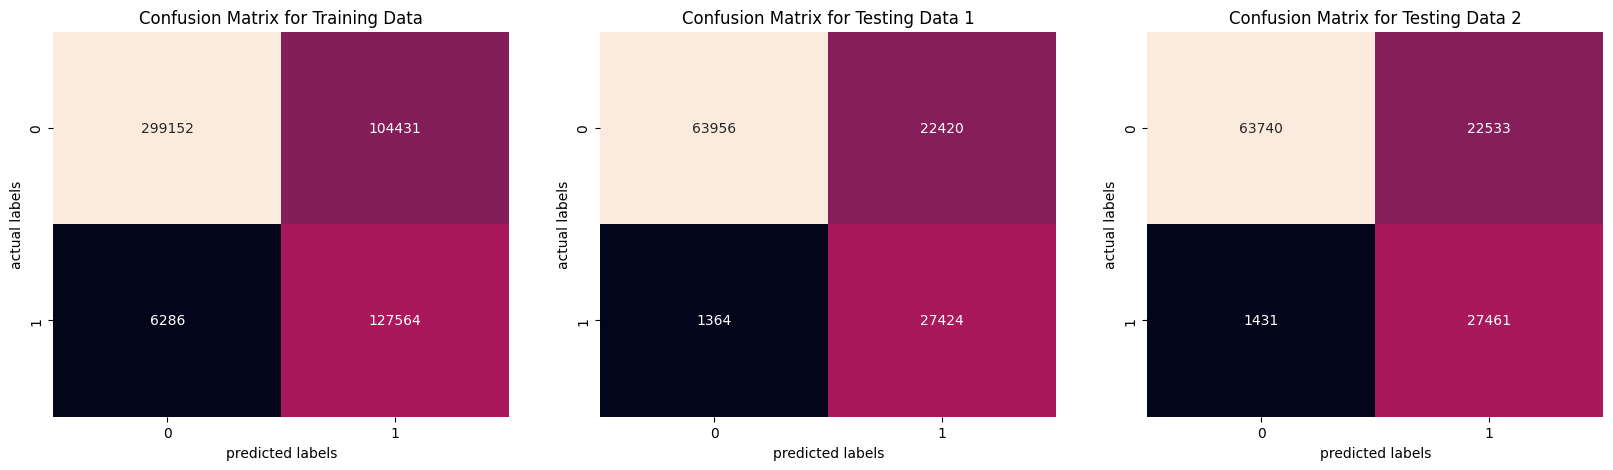

In [80]:
model_performance(model_name=xgb_final,
                      X_train_data=X_train,
                      y_train_data=y_train, 
                      X_test_data1=X_test1,
                      y_test_data1=y_test1,
                      X_test_data2=X_test2,
                      y_test_data2=y_test2)

AUC Score for Model on Training Data is 0.9263
AUC Score for Model on Testing Data 1 is 0.9263
AUC Score for Model on Testing Data 2 is 0.9239


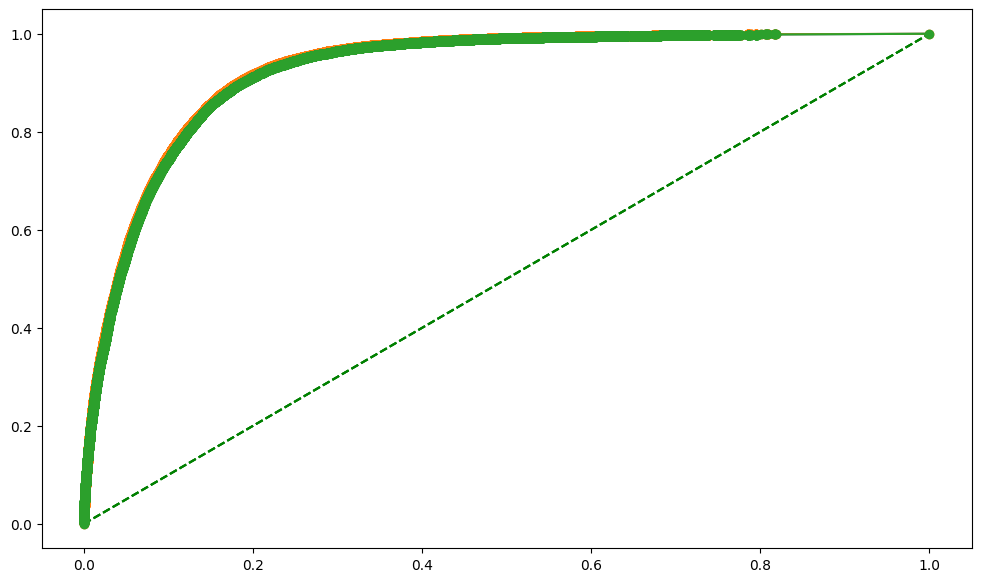

In [81]:
roc_score_auc_curve(model_name=xgb_final,
                      X_train_data=X_train,
                      y_train_data=y_train, 
                      X_test_data1=X_test1,
                      y_test_data1=y_test1,
                      X_test_data2=X_test2,
                      y_test_data2=y_test2)

In [82]:
def k_fold_cross_valscore(model_name,
                          x_train_data,
                          y_train_data,
                          folds
                         ):
    from sklearn.model_selection import cross_val_score
    import pandas as pd
    
    model_kfold_recall = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='recall', verbose=0)
    model_kfold_accuracy = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='accuracy', verbose=0)
    model_kfold_precision = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='precision', verbose=0)
    model_kfold_f1 = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='f1', verbose=0)
    
    a = pd.DataFrame(model_kfold_recall)
    b = pd.DataFrame(model_kfold_accuracy)
    c = pd.DataFrame(model_kfold_precision)
    d = pd.DataFrame(model_kfold_f1)

    cross_val_data = pd.concat([a,b,c,d], ignore_index=True, axis=1)
    cross_val_data.rename(columns={0:"Recall", 1:"Accuracy", 2:"Precision",3:"F1 Score"},
                        inplace=True)
       
   
    print('\n')
    print("The mean recall for the model after " ,folds," folds is ", np.mean(model_kfold_recall))
    print("The mean accuracy for model after ",folds," folds is", np.mean(model_kfold_accuracy))
    print("the mean precision for the model after ",folds," folds is",np.mean(model_kfold_precision))
    print("the mean f1 score for the model after ",folds," folds is", np.mean(model_kfold_f1))
    print("\n")
    return cross_val_data

In [83]:
# K- Fold Cross Validation for Training Data
k_fold_cross_valscore(model_name =xgb_final,
                      x_train_data = X_train,
                      y_train_data = y_train,
                      folds = 10)



The mean recall for the model after  10  folds is  0.951258871871498
The mean accuracy for model after  10  folds is 0.7934403032774204
the mean precision for the model after  10  folds is 0.5492665726393477
the mean f1 score for the model after  10  folds is 0.6964139120276867




,Recall,Accuracy,Precision,F1 Score
0,0.952260,0.793428,0.549184,0.696617
1,0.946731,0.790767,0.546113,0.692667
2,0.951737,0.793614,0.549450,0.696691
3,0.948674,0.792103,0.547705,0.694468
4,0.951588,0.791694,0.547028,0.694701
5,0.952858,0.794578,0.550620,0.697931
6,0.946731,0.792010,0.547694,0.693938
7,0.955099,0.794950,0.550963,0.698808
8,0.955323,0.799044,0.556223,0.703085
9,0.951588,0.792215,0.547687,0.695232


In [84]:
# K- Fold Cross Validation for Testing Data 1
k_fold_cross_valscore(model_name =xgb_final,
                      x_train_data = X_test1,
                      y_train_data = y_test1,
                      folds = 10)



The mean recall for the model after  10  folds is  0.9525843971864025
The mean accuracy for model after  10  folds is 0.7964380614331449
the mean precision for the model after  10  folds is 0.5540363284210338
the mean f1 score for the model after  10  folds is 0.7005788852052095




,Recall,Accuracy,Precision,F1 Score
0,0.949983,0.802726,0.562410,0.706536
1,0.953456,0.799774,0.558267,0.704207
2,0.956929,0.797343,0.554884,0.702448
3,0.957277,0.793002,0.549332,0.698075
4,0.946491,0.798194,0.556600,0.700978
5,0.958304,0.800278,0.558526,0.705732
6,0.948593,0.797846,0.556099,0.701155
7,0.948246,0.790726,0.546985,0.693774
8,0.951372,0.793071,0.549779,0.696858
9,0.955193,0.791421,0.547482,0.696026


In [85]:
# K- Fold Cross Validation for Testing Data 2
k_fold_cross_valscore(model_name =xgb_final,
                      x_train_data = X_test2,
                      y_train_data = y_test2,
                      folds = 10)



The mean recall for the model after  10  folds is  0.9514051149749495
The mean accuracy for model after  10  folds is 0.7937394003813865
the mean precision for the model after  10  folds is 0.5515703515252569
the mean f1 score for the model after  10  folds is 0.6982927167668448




,Recall,Accuracy,Precision,F1 Score
0,0.950502,0.793175,0.550853,0.697485
1,0.950502,0.797777,0.556772,0.702212
2,0.952233,0.792654,0.550090,0.697338
3,0.950173,0.793783,0.551738,0.698106
4,0.956055,0.793262,0.550728,0.698874
5,0.947733,0.795415,0.553915,0.699183
6,0.953963,0.788642,0.544987,0.693682
7,0.944618,0.795849,0.554675,0.698937
8,0.957771,0.792984,0.550209,0.698914
9,0.950502,0.793852,0.551738,0.698195


# Shap Analysis for XGBoost Model

In [88]:
# !pip install shap

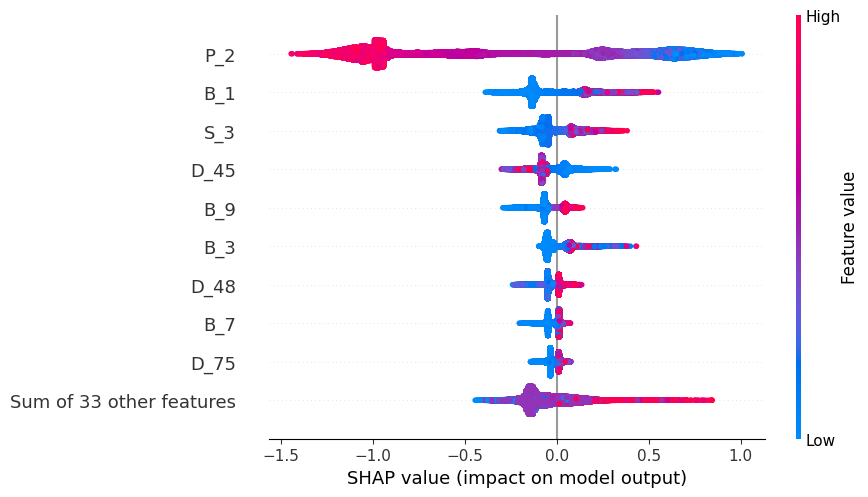

In [89]:
import shap

# bee swarm plot
explainer = shap.Explainer(xgb_final)
shap_values = explainer(X_test2)

shap.plots.beeswarm(shap_values)

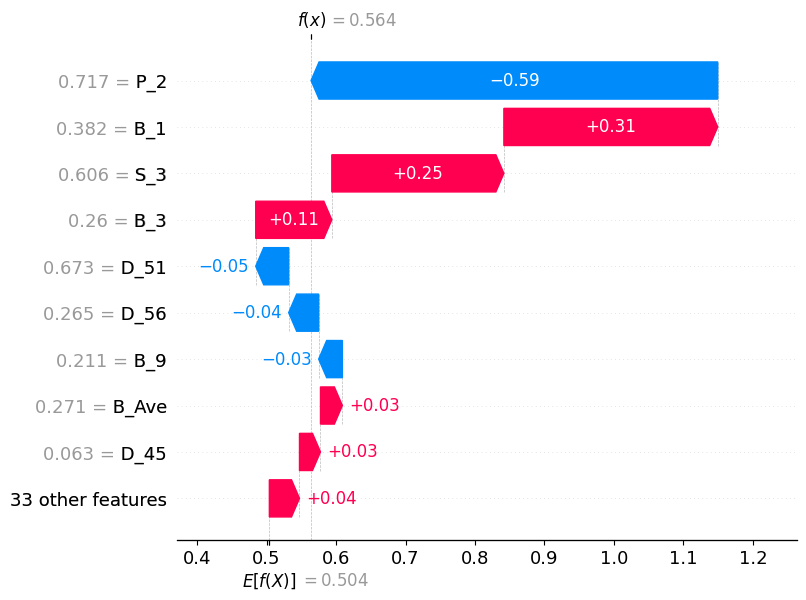

In [90]:
# waterfall plot
shap.plots.waterfall(shap_values[150])

In [93]:
# Assuming you have already created the explainer and computed shap_values
explainer = shap.Explainer(xgb_final)
shap_values = explainer(X_test2)

# Identify the top 5 features with the highest average SHAP values
feature_names = X_test2.columns
avg_shap_values = np.abs(shap_values.values).mean(axis=0)
top_features_idx = np.argsort(avg_shap_values)[-5:][::-1]
top_features = [feature_names[i] for i in top_features_idx]

# Calculate the requested summary statistics for the top features
summary_stats = []
for feature in top_features:
    feature_values = X_test2[feature]
    feature_values_no_na = feature_values.dropna()  # Handle missing values
    summary = [
        feature,
        feature_values_no_na.min(),
        np.percentile(feature_values_no_na, 1),
        np.percentile(feature_values_no_na, 5),
        np.median(feature_values_no_na),
        np.percentile(feature_values_no_na, 95),
        np.percentile(feature_values_no_na, 99),
        feature_values_no_na.max(),
        feature_values_no_na.mean(),
        100 * (len(X_test2) - len(feature_values_no_na)) / len(X_test2)  # Percent missing
    ]
    summary_stats.append(summary)

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(
    summary_stats,
    columns=["Feature", "Min", "1st Percentile", "5th Percentile", "Median", "95th Percentile", "99th Percentile", "Max", "Mean", "%Missing"]
)

summary_df

,Feature,Min,1st Percentile,5th Percentile,Median,95th Percentile,99th Percentile,Max,Mean,%Missing
0,P_2,-3.449725e-01,0.006361,0.220274,0.695203,0.976658,1.005718,1.009993,0.656805,0.0
1,B_1,-5.964713e-01,0.000500,0.002121,0.031320,0.605082,1.003384,1.323970,0.124244,0.0
2,S_3,-4.822734e-01,0.014017,0.070309,0.163977,0.568568,0.967628,3.082200,0.216382,0.0
3,D_45,9.126671e-06,0.005038,0.013498,0.181175,0.770793,1.028302,1.595176,0.254004,0.0
4,B_9,6.726070e-09,0.000242,0.001181,0.026004,0.651647,0.983415,14.026421,0.190022,0.0


# Score Bins for Best XGBoost Model

Parameters of the final model: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 5, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


AUC on Train: 0.9263182103739449
AUC on Test 1: 0.9263241306650428
AUC on

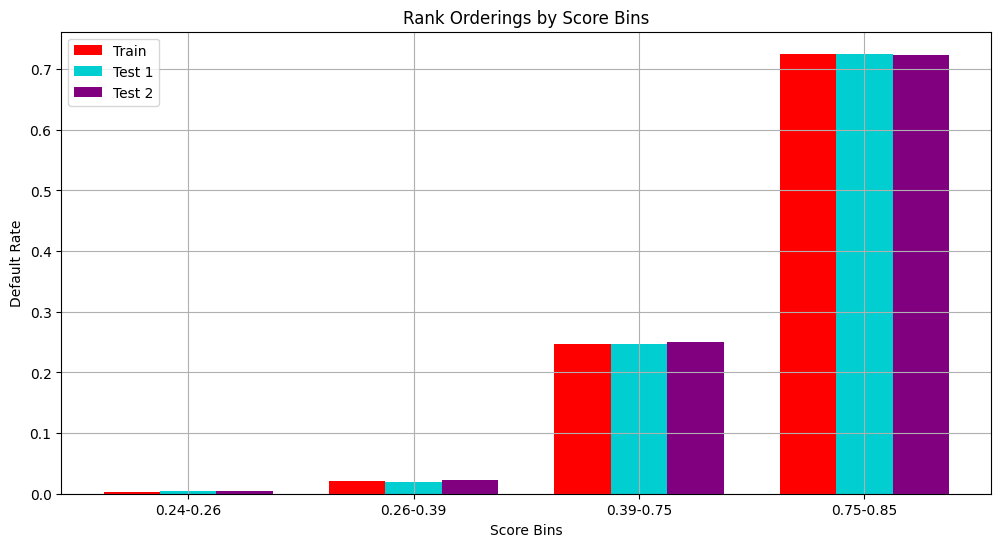

In [94]:
# 1. Show the parameters of the final model
print("Parameters of the final model:", xgb_final.get_params())
print('\n')

# 2. Calculate and display AUC on each sample
y_train_pred = xgb_final.predict_proba(X_train)[:, 1]
y_test1_pred = xgb_final.predict_proba(X_test1)[:, 1]
y_test2_pred = xgb_final.predict_proba(X_test2)[:, 1]

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test1 = roc_auc_score(y_test1, y_test1_pred)
auc_test2 = roc_auc_score(y_test2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# 3. Define score bins based on the train sample
train_scores = xgb_final.predict_proba(X_train)[:, 1]
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# 4. Apply the same thresholds to test samples and calculate default rates
def calculate_default_rate(y_true, y_pred, bins):
    indices = np.digitize(y_pred, bins) - 1  # Find bin index for each prediction
    default_rate = [np.mean(y_true[indices == i]) for i in range(len(bins)-1)]
    return default_rate

default_rates_train = calculate_default_rate(y_train, y_train_pred, bins)
default_rates_test1 = calculate_default_rate(y_test1, y_test1_pred, bins)
default_rates_test2 = calculate_default_rate(y_test2, y_test2_pred, bins)


color_train = 'red'  # Red color
color_test1 = '#00CED1'  # Turquoise color (HEX code)
color_test2 = 'purple'  # Purple color


# 5. Show rank orderings in a Bar-Chart
width = 0.25  # Width of the bars
x_indexes = np.arange(len(bins)-1)

plt.figure(figsize=(12, 6))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', color=color_train)
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', color=color_test1)
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', color=color_test2)

# Formatting the plot
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)])
plt.legend()
plt.grid(True)
plt.show()

# Outlier Analysis

In [95]:
df4 = df3.copy()

In [96]:
print(features)

['D_46', 'R_Ave', 'D_63_CO', 'D_63_XM', 'B_38_4.0', 'D_79', 'B_Ave', 'B_Total', 'B_6', 'S_23', 'D_112', 'B_7', 'B_Ave_6_months', 'B_5', 'R_Total', 'D_56', 'S_3', 'R_Ave_3_months', 'D_43', 'R_Ave_6_months', 'D_44', 'B_1', 'D_41', 'D_75', 'B_2', 'P_2', 'D_42', 'D_51', 'B_38_2.0', 'B_4', 'D_129', 'D_48', 'D_45', 'B_9', 'B_10', 'R_27', 'R_26', 'D_49', 'R_1', 'R_Ave_12_months', 'B_3', 'B_Ave_3_months']


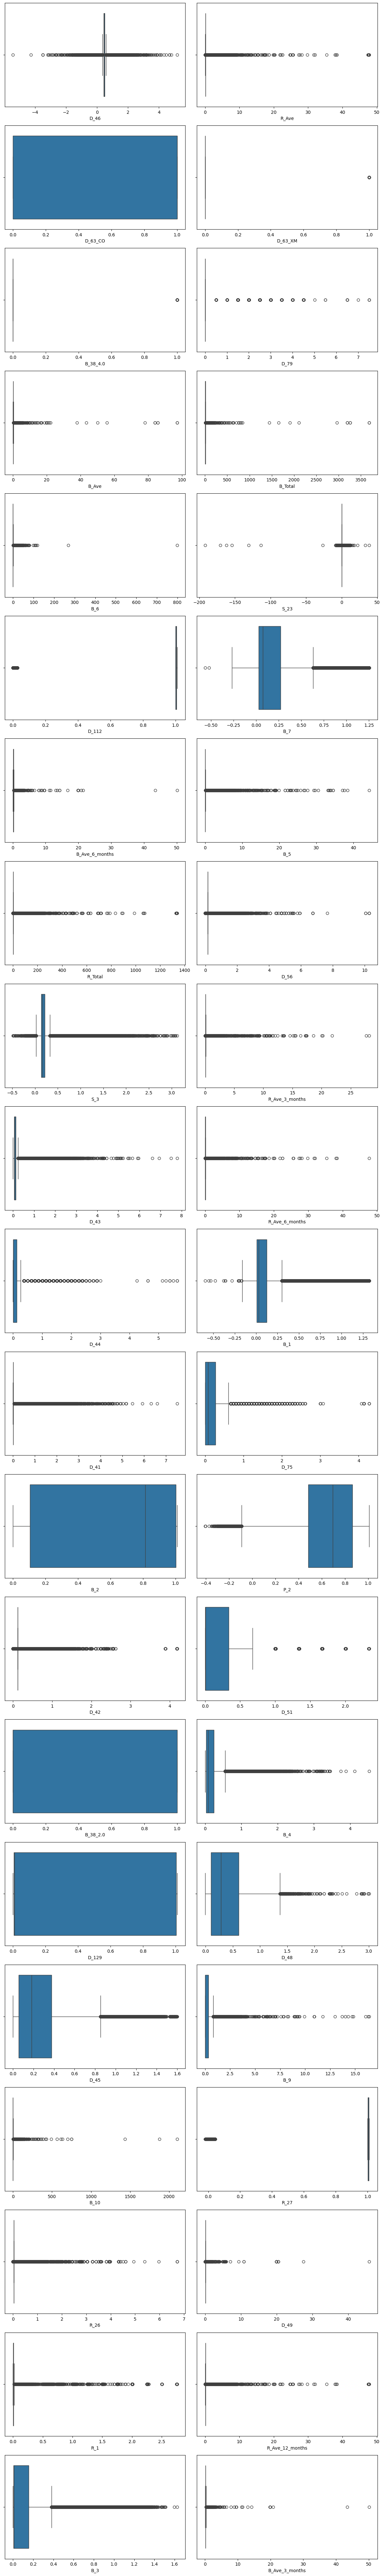

In [97]:
num_plots = len(features)

num_rows = (num_plots + 1) // 2 # to make sure we have enough rows for odd number of variables
num_cols = 2

# create subplots with the above calculated num_rows and num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,80))

axes = axes.flatten()

# iterate over the columns and create boxplots
for i, column in enumerate(features):
    sns.boxplot(x = column, data=df4, ax=axes[i]) #orient='v')
    #sns.despine(offset = 10, trim=True, ax=axes[i])

# hide any empty subplots
# for j in range(len(num), len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Cap and floor observations at 1st and 99th percentiles (Train sample)
lower_percentile = df4.drop(["customer_ID", "S_2", "target"], axis=1).quantile(0.01)
upper_percentile = df4.drop(["customer_ID", "S_2", "target"], axis=1).quantile(0.99)
df4_out_removed = df4.drop(["customer_ID", "S_2", "target"], axis=1).clip(lower=lower_percentile,
                                                                     upper=upper_percentile,
                                                                     axis=1)

# Step 3: Replace missing values with 0
df4_out_removed = df4_out_removed.fillna(0)

# Step 2: Standardize (normalize) the data based on Mean and Standard Deviation from Train sample
scaler = StandardScaler()

# Fit the scaler on the Train sample data
scaler.fit(df4_out_removed)

# Transform the Train, Test1, and Test2 samples
X = df4_out_removed  # Use the capped and standardized data
y = df4['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Apply the same scaling to all data subsets
X_train = scaler.transform(X_train)
X_test1 = scaler.transform(X_test1)
X_test2 = scaler.transform(X_test2)

# Neural Network

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming your datasets are defined: X_train, y_train, X_test1, y_test1, X_test2, y_test2

def build_model(hidden_layers, nodes, activation, dropout, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(shape=(input_shape,)))  # Adjust based on your dataset
    for _ in range(hidden_layers):
        model.add(Dense(nodes, activation=activation))
        if dropout < 1.0:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

results_list = []  # List to hold all results before creating DataFrame

parameter_grid = [
    (hl, n, af, d, bs)
    for hl in [2, 4]
    for n in [4, 6]
    for af in ['relu', 'tanh']
    for d in [0.5, 0.0]  # 0.0 represents no dropout
    for bs in [100, 10000]
]

input_shape = X_train.shape[1]  # Ensure this matches your dataset

for hl, n, af, d, bs in parameter_grid:
    model = build_model(hl, n, af, d, input_shape)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=bs, verbose=0)
    
    # Evaluate model performance using roc_auc_score
    auc_train = roc_auc_score(y_train, model.predict(X_train).ravel())
    auc_test_1 = roc_auc_score(y_test1, model.predict(X_test1).ravel())
    auc_test_2 = roc_auc_score(y_test2, model.predict(X_test2).ravel())
    
    # Collect results
    results_list.append({
        '# HL': hl,
        '# Node': n,
        'Activation Function': af,
        'Dropout': d,
        'Batch Size': bs,
        'AUC Train': auc_train,
        'AUC Test 1': auc_test_1,
        'AUC Test 2': auc_test_2
    })

# Convert the list of dictionaries to a DataFrame
results_df_nn = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
results_df_nn.to_csv('grid_search_results_nn.csv', index=False)

print("Grid search completed and results saved.")

16795/16795 ━━━━━━━━━━━━━━━━━━━━ 15s 866us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 840us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 862us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 16s 955us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 842us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 14s 853us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 881us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 865us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 14s 843us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 786us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 880us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 15s 912us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 15s 913us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 894us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 15s 896us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 815us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 838us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 1

In [81]:
results_df_nn

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,0.5,100,0.909950,0.910248,0.909084
1,2,4,relu,0.5,10000,0.918418,0.919725,0.917964
2,2,4,relu,0.0,100,0.933205,0.934030,0.932357
3,2,4,relu,0.0,10000,0.927684,0.928676,0.927315
4,2,4,tanh,0.5,100,0.930401,0.931599,0.929836
5,2,4,tanh,0.5,10000,0.930554,0.931703,0.930125
6,2,4,tanh,0.0,100,0.933622,0.934339,0.932977
7,2,4,tanh,0.0,10000,0.930719,0.931448,0.929854
8,2,6,relu,0.5,100,0.931800,0.933030,0.931301
9,2,6,relu,0.5,10000,0.929381,0.930490,0.929016


In [82]:
# calculate the mean auc
results_df_nn['Average AUC'] = results_df_nn[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
# calculate the std for auc
results_df_nn['Std AUC'] = results_df_nn[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

results_df_nn
# results_df_xgb.iloc[:, 5:]

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2,Average AUC,Std AUC
0,2,4,relu,0.5,100,0.909950,0.910248,0.909084,0.909760,0.000605
1,2,4,relu,0.5,10000,0.918418,0.919725,0.917964,0.918703,0.000914
2,2,4,relu,0.0,100,0.933205,0.934030,0.932357,0.933197,0.000837
3,2,4,relu,0.0,10000,0.927684,0.928676,0.927315,0.927892,0.000704
4,2,4,tanh,0.5,100,0.930401,0.931599,0.929836,0.930612,0.000900
5,2,4,tanh,0.5,10000,0.930554,0.931703,0.930125,0.930794,0.000816
6,2,4,tanh,0.0,100,0.933622,0.934339,0.932977,0.933646,0.000682
7,2,4,tanh,0.0,10000,0.930719,0.931448,0.929854,0.930674,0.000798
8,2,6,relu,0.5,100,0.931800,0.933030,0.931301,0.932044,0.000890
9,2,6,relu,0.5,10000,0.929381,0.930490,0.929016,0.929629,0.000767


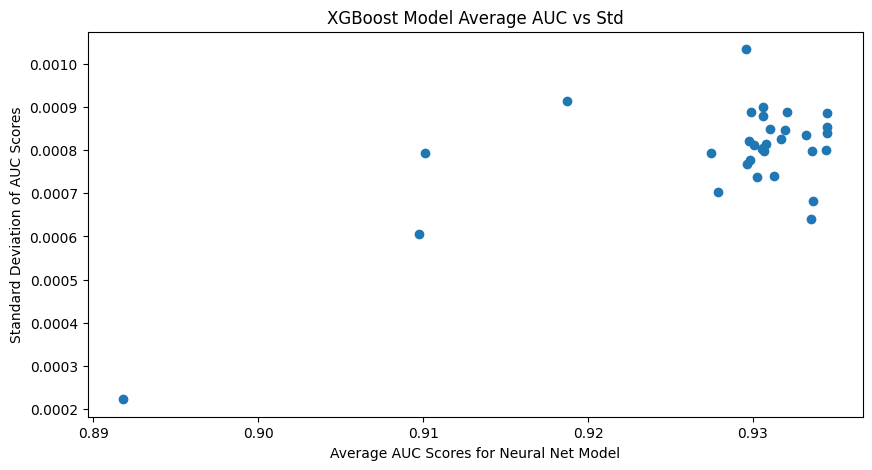

In [83]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_nn['Average AUC'], results_df_nn['Std AUC'])
xlab = 'Average AUC Scores for Neural Net Model'
ylab = 'Standard Deviation of AUC Scores'
title = 'XGBoost Model Average AUC vs Std'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

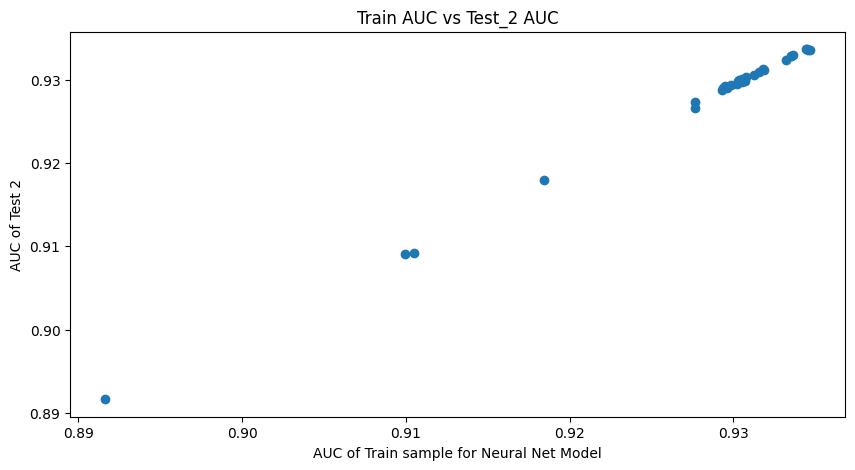

In [84]:
plt.figure(figsize=(10, 5))
plt.scatter(results_df_nn['AUC Train'], results_df_nn['AUC Test 2'])
xlab = 'AUC of Train sample for Neural Net Model'
ylab = 'AUC of Test 2'
title = 'Train AUC vs Test_2 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

# Best Neural Network based on Bias-Variance

In [85]:
# Analyze the results to get the optimal parameters
# Load the results
# results_df_nn = pd.read_csv('grid_search_results_nn.csv')
results_df_nn
# Find the row with the highest test AUC and smallest difference between train and test AUC
results_df_nn['AUC Diff'] = abs(results_df_nn['AUC Train'] - results_df_nn[['AUC Test 1', 'AUC Test 2']].mean(axis=1))
best_model_nn = results_df_nn.loc[(results_df_nn[['AUC Test 1', 'AUC Test 2']].mean(axis=1) - results_df_nn['AUC Diff']).idxmax()]

print("Optimal Parameters:")
print(best_model_nn)

Optimal Parameters:
# HL                          4
# Node                        6
Activation Function        relu
Dropout                     0.0
Batch Size                  100
AUC Train              0.934501
AUC Test 1             0.935337
AUC Test 2             0.933631
Average AUC             0.93449
Std AUC                0.000853
AUC Diff               0.000016
Name: 26, dtype: object


In [86]:
# Extracting parameters from best_model_nn
hl = int(best_model_nn['# HL'])  # Number of hidden layers
n = int(best_model_nn['# Node'])  # Nodes per layer
af = best_model_nn['Activation Function']  # Activation function
d = float(best_model_nn['Dropout'])  # Dropout rate
bs = int(best_model_nn['Batch Size'])  # Batch size

# Define the final model (nn_final) with optimum parameters
nn_final = Sequential()
nn_final.add(tf.keras.Input(shape=(X_train.shape[1],)))  # Use the actual input shape of your dataset
for _ in range(hl):
    nn_final.add(Dense(n, activation=af))
    if d < 1.0:
        nn_final.add(Dropout(d))
nn_final.add(Dense(1, activation='sigmoid'))  # Assuming a binary classification task
nn_final.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

# Train the model (nn_final) with optimal parameters
nn_final.fit(X_train, y_train, epochs=20, batch_size=bs, verbose=1)

Epoch 1/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - auc: 0.8941 - loss: 0.3413
Epoch 2/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9315 - loss: 0.2839
Epoch 3/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9327 - loss: 0.2804
Epoch 4/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9332 - loss: 0.2794
Epoch 5/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9330 - loss: 0.2801
Epoch 6/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9330 - loss: 0.2801
Epoch 7/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9334 - loss: 0.2791
Epoch 8/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9331 - loss: 0.2797
Epoch 9/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9333 - loss: 0.2796
Epoch 10/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9329 - loss: 0.2803
Epoch 11/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9340 - loss: 0.2780
Epoch 12/20
5375/5375 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.9331 - loss: 0.2802
E

In [87]:
print(nn_final)

<Sequential name=sequential_32, built=True>


In [88]:
# Evaluate the model
auc_train = roc_auc_score(y_train, nn_final.predict(X_train).ravel())
auc_test_1 = roc_auc_score(y_test1, nn_final.predict(X_test1).ravel())
print(f"Retrained Model AUC: Train={auc_train}, Test1={auc_test_1}")

16795/16795 ━━━━━━━━━━━━━━━━━━━━ 10s 605us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 622us/step
Retrained Model AUC: Train=0.9340498172065264, Test1=0.9346269463697459


In [89]:
from sklearn.metrics import classification_report, confusion_matrix

def model_performance(model, X_train, y_train, X_test1, y_test1, X_test2, y_test2): 
    # Getting predictions
    train_preds = model.predict(X_train).ravel()
    test_preds1 = model.predict(X_test1).ravel()
    test_preds2 = model.predict(X_test2).ravel()
    
    # Converting probabilities to class labels based on 0.5 threshold
    train_preds = np.where(train_preds > 0.5, 1, 0)
    test_preds1 = np.where(test_preds1 > 0.5, 1, 0)
    test_preds2 = np.where(test_preds2 > 0.5, 1, 0)

    # Classification reportsSlide #17. Strategy. Include the function you have written in step 17. Also include the following table. Explain what thresholds you chose for conservative and aggressive strategy, and explain your rationale.

    print('Classification report for training data')
    print(classification_report(y_train, train_preds))
    print('Classification report for testing data 1')
    print(classification_report(y_test1, test_preds1))
    print('Classification report for testing data 2')
    print(classification_report(y_test2, test_preds2))

    # Plotting confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    sns.heatmap(confusion_matrix(y_train, train_preds), annot=True, cbar=False, fmt='d', ax=axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('Actual labels')
    axes[0].set_title('Confusion Matrix for Training Data')
    
    sns.heatmap(confusion_matrix(y_test1, test_preds1), annot=True, cbar=False, fmt='d', ax=axes[1])
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')
    axes[1].set_title('Confusion Matrix for Testing Data 1')
    
    sns.heatmap(confusion_matrix(y_test2, test_preds2), annot=True, cbar=False, fmt='d', ax=axes[2])
    axes[2].set_xlabel('Predicted labels')
    axes[2].set_ylabel('Actual labels')
    axes[2].set_title('Confusion Matrix for Testing Data 2')
    
    plt.tight_layout()
    plt.show()


16795/16795 ━━━━━━━━━━━━━━━━━━━━ 10s 598us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 633us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step
Classification report for training data
              precision    recall  f1-score   support

           0       0.92      0.91      0.91    403583
           1       0.74      0.76      0.75    133850

    accuracy                           0.87    537433
   macro avg       0.83      0.84      0.83    537433
weighted avg       0.87      0.87      0.87    537433

Classification report for testing data 1
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     86376
           1       0.74      0.76      0.75     28788

    accuracy                           0.87    115164
   macro avg       0.83      0.84      0.83    115164
weighted avg       0.87      0.87      0.87    115164

Classification report for testing data 2
              precision    recall  f1-score   support

           0       0.92      0.

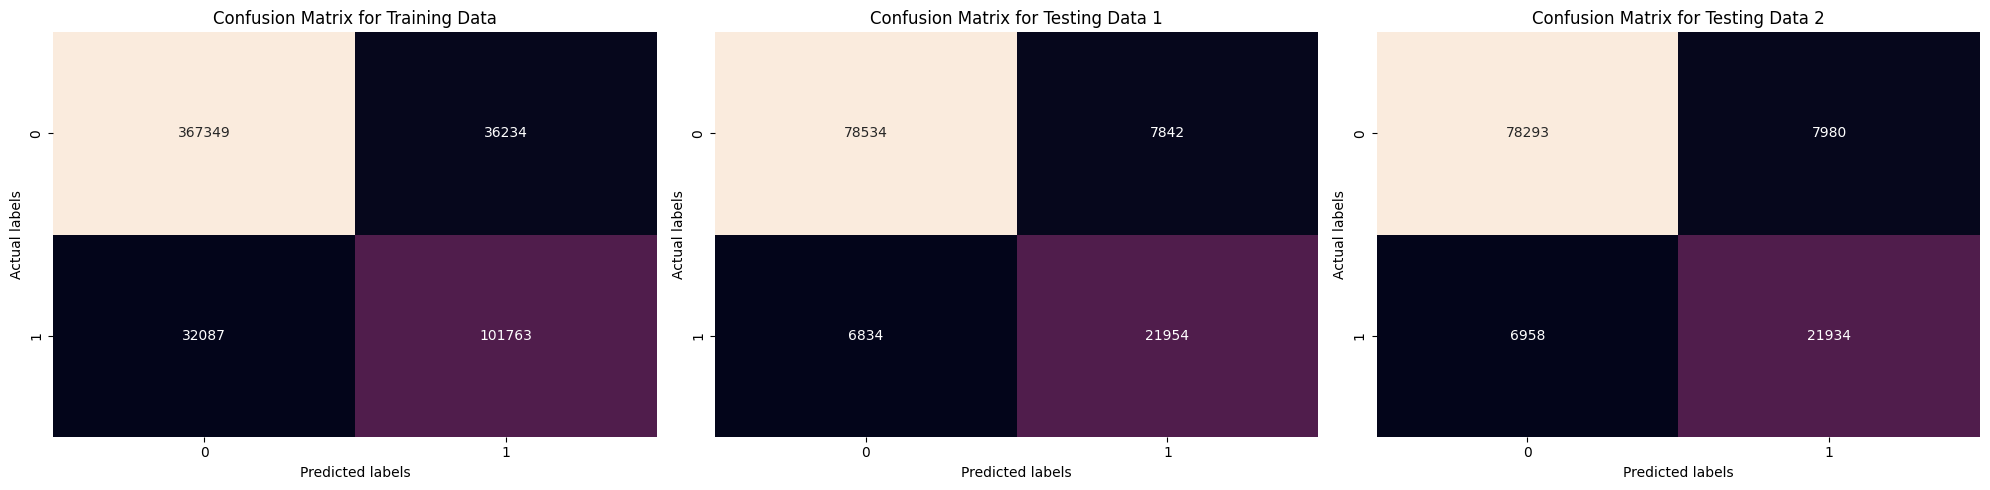

In [90]:
model_performance(nn_final, X_train, y_train, X_test1, y_test1, X_test2, y_test2)

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def roc_score_auc_curve_nn(model, X_train, y_train, X_test1, y_test1, X_test2, y_test2):
    # Getting the predicted probabilities
    train_preds = model.predict(X_train).ravel()
    test_preds1 = model.predict(X_test1).ravel()
    test_preds2 = model.predict(X_test2).ravel()
    
    # Calculating ROC AUC scores
    a = round(roc_auc_score(y_train, train_preds), 4)
    b = round(roc_auc_score(y_test1, test_preds1), 4)
    c = round(roc_auc_score(y_test2, test_preds2), 4)
    
    print('AUC Score for Model on Training Data is', a)
    print('AUC Score for Model on Testing Data 1 is', b)
    print('AUC Score for Model on Testing Data 2 is', c)
    
    # Plotting ROC curves
    plt.figure(figsize=(12, 7))
    
    # Training Data
    train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
    plt.plot(train_fpr, train_tpr, label=f'Train AUC: {a}', marker='.')
    
    # Test Data 1
    test_fpr, test_tpr, _ = roc_curve(y_test1, test_preds1)
    plt.plot(test_fpr, test_tpr, label=f'Test 1 AUC: {b}', marker='o')
    
    # Test Data 2
    test_fpr2, test_tpr2, _ = roc_curve(y_test2, test_preds2)
    plt.plot(test_fpr2, test_tpr2, label=f'Test 2 AUC: {c}', marker='x')
    
    # Line of No Discrimination
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

16795/16795 ━━━━━━━━━━━━━━━━━━━━ 11s 642us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step
AUC Score for Model on Training Data is 0.934
AUC Score for Model on Testing Data 1 is 0.9346
AUC Score for Model on Testing Data 2 is 0.9329


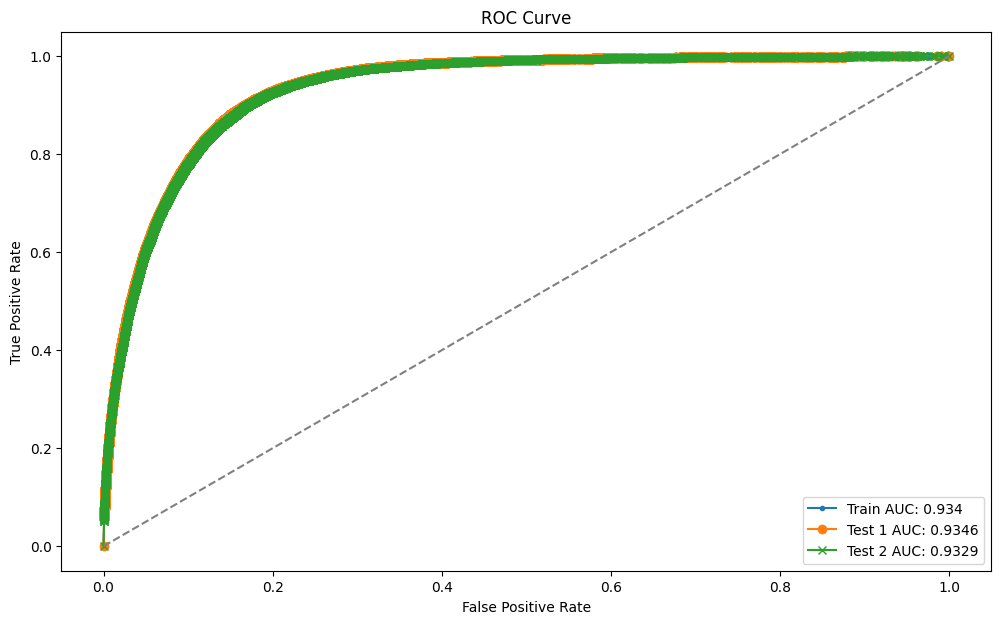

In [92]:
roc_score_auc_curve_nn(nn_final, X_train, y_train, X_test1, y_test1, X_test2, y_test2)

# Score Bins for Neural Nets

16795/16795 ━━━━━━━━━━━━━━━━━━━━ 11s 650us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 743us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 669us/step
AUC on Train: 0.9340498172065264
AUC on Test 1: 0.9346269463697459
AUC on Test 2: 0.9329086688709763


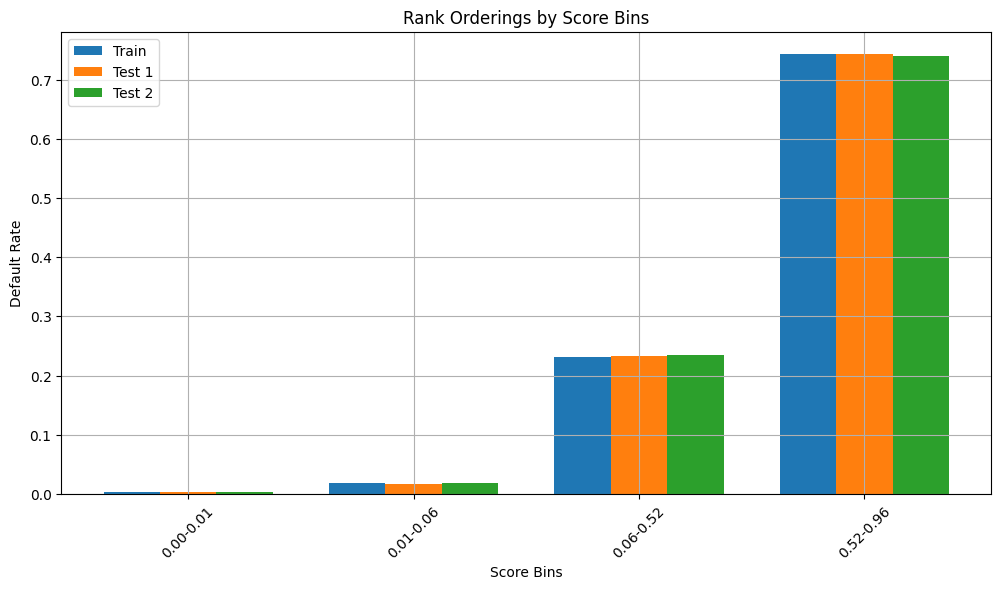

In [93]:
# Calculate AUC on each sample

y_train_pred = nn_final.predict(X_train)
y_test1_pred = nn_final.predict(X_test1)
y_test2_pred = nn_final.predict(X_test2)

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test1 = roc_auc_score(y_test1, y_test1_pred)
auc_test2 = roc_auc_score(y_test2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = y_train_pred.reshape(-1)
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# Calculate the value ranges for each bin
bin_ranges = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Apply the same thresholds to test samples
test1_scores = y_test1_pred.reshape(-1)
test2_scores = y_test2_pred.reshape(-1)

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
    default_rates = []
    for i in range(len(bins) - 1):
        mask = (scores >= bins[i]) & (scores <= bins[i + 1])
        if np.sum(mask) > 0:
            default_rate = np.sum(y[mask]) / np.sum(mask)
            default_rates.append(default_rate)
        else:
            default_rates.append(0.0)
    return default_rates

default_rates_train = calculate_default_rate(train_scores, y_train)
default_rates_test1 = calculate_default_rate(test1_scores, y_test1)
default_rates_test2 = calculate_default_rate(test2_scores, y_test2)

x_indexes = np.arange(len(bin_ranges))

width = 0.25
plt.figure(figsize=(12, 6))
plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, bin_ranges, rotation=45)  # Display bin ranges on the x-axis
plt.legend()
plt.grid(True)
plt.show()

# Choosing Between NN and XGB

In [94]:
best_model_nn

# HL                          4
# Node                        6
Activation Function        relu
Dropout                     0.0
Batch Size                  100
AUC Train              0.934501
AUC Test 1             0.935337
AUC Test 2             0.933631
Average AUC             0.93449
Std AUC                0.000853
AUC Diff               0.000016
Name: 26, dtype: object

In [96]:
best_model_xgb

n_estimators                 50
learning_rate              0.01
Subsample %               50.0%
Features                  50.0%
% Weight of Default           5
AUC Train              0.926768
AUC Test 1             0.926775
AUC Test 2             0.925061
Average AUC            0.926201
Std AUC                0.000988
AUC Diff               0.000007
Name: 2, dtype: object

In [97]:
# Calculate average AUC scores directly within a dictionary for easier comparison
avg_aucs = {
    "XGB Model": (best_model_xgb['AUC Test 1'] + best_model_xgb['AUC Test 2']) / 2,
    "NN Model": (best_model_nn['AUC Test 1'] + best_model_nn['AUC Test 2']) / 2
}

# Print the average AUC values for both models
print(f"Avg AUC value of XGB Model: {avg_aucs['XGB Model']:.5f}")
print(f"Avg AUC value of NN Model: {avg_aucs['NN Model']:.5f}")

# Identify the best model based on the highest average AUC score
best_model, best_avg_auc = max(avg_aucs.items(), key=lambda item: item[1])

# Print the result stating the best model and its average AUC value
print(f"The best model is {best_model} with Avg AUC value of: {best_avg_auc:.5f}")

Avg AUC value of XGB Model: 0.92592
Avg AUC value of NN Model: 0.93448
The best model is NN Model with Avg AUC value of: 0.93448


# Exporting the Neural Network Model and XGBoost Model

In [98]:
xgb_final.save_model('best_xgb_model.json')

In [99]:
best_nn_model = nn_final
best_nn_model

best_nn_model.save('best_nn_model.keras')

# Strategy

In [100]:
X = df3.drop(['customer_ID','S_2','target'], axis=1)
y = df3['target']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

In [102]:
# Get predictions for the train dataset 
nn_predictions_train = (nn_final.predict(X_train) > 0.5).astype("int32")

# Get predictions for the test1 dataset
nn_predictions_test1 = (nn_final.predict(X_test1) > 0.5).astype("int32")

# Get predictions for the test2 dataset
nn_predictions_test2 = (nn_final.predict(X_test2) > 0.5).astype("int32")

# Get predicted probabilities for the train dataset
nn_probs_train = nn_final.predict(X_train)

# Get predicted probabilities for the test1 dataset
nn_probs_test1 = nn_final.predict(X_test1)

# Get predicted probabilities for the test2 dataset
nn_probs_test2 = nn_final.predict(X_test2)

16795/16795 ━━━━━━━━━━━━━━━━━━━━ 12s 704us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 681us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 720us/step
16795/16795 ━━━━━━━━━━━━━━━━━━━━ 10s 615us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 614us/step


### Training Data

In [108]:
# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018)
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
date_feature_train = pd.to_datetime(df3['S_2'])  # Convert to datetime if not already
filtered_data_train = df3[(date_feature_train >= start_date) & (date_feature_train <= end_date)]
average_spend_train = filtered_data_train['S_3'].mean()
average_balance_train = filtered_data_train['B_10'].mean()

# Calculate the monthly revenue for 1 customer
monthly_revenue_train = average_balance_train * 0.02 + average_spend_train * 0.001

# Calculate the expected annual revenue over the next 12 months
expected_revenue_train = monthly_revenue_train * 12

# Assuming your neural network model is fitted and ready to make predictions
# Get predicted probabilities for the train dataset using your TensorFlow model
# Flatten the output if it's not already flat
nn_probs_train_flat = nn_final.predict(X_train).flatten()

# Initialize an empty list to store dictionaries of the results
results = []

for threshold in thresholds:
    # Determine accepted applicants based on the threshold
    accepted_indices_train = nn_probs_train_flat < threshold
    total_applicants_train = np.sum(accepted_indices_train)
    defaulted_applicants_train = np.sum(y_train[accepted_indices_train])

    # Avoid division by zero
    default_rate_train = defaulted_applicants_train / total_applicants_train if total_applicants_train > 0 else 0
    
    # Calculate the portfolio revenue
    portfolio_revenue_value_train = expected_revenue_train * total_applicants_train

    # Append a dictionary of results for this threshold
    results.append({
        'Threshold': threshold,
        'Default Rate': default_rate_train,
        'Portfolio Revenue': portfolio_revenue_value_train,
        'Applicant Count': total_applicants_train
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

16795/16795 ━━━━━━━━━━━━━━━━━━━━ 11s 655us/step


,Threshold,Default Rate,Portfolio Revenue,Applicant Count
0,0.1,0.216867,9.538479,166
1,0.2,0.110650,41.544097,723
2,0.3,0.010962,1493.863657,25998
3,0.4,0.038721,4359.889176,75876
4,0.5,0.112524,5792.844475,100814
5,0.6,0.201083,6897.009566,120030
6,0.7,0.235884,7283.547793,126757
7,0.8,0.245422,7382.610064,128481
8,0.9,0.249770,7428.463715,129279
9,1.0,0.256160,7502.243272,130563


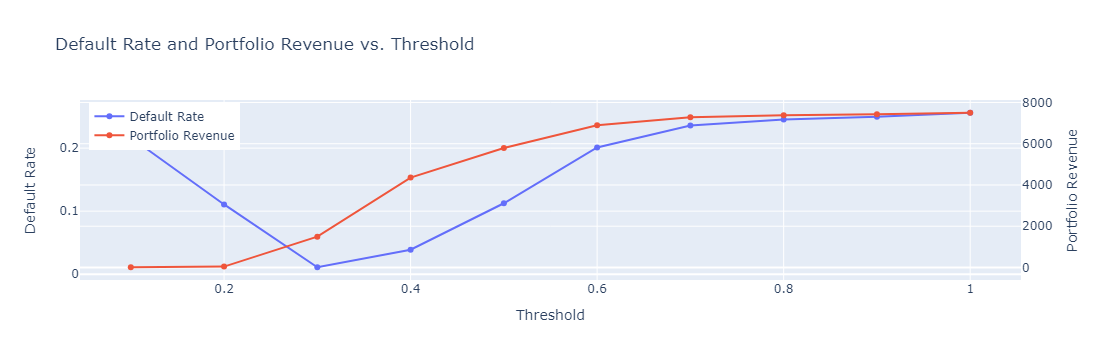

In [113]:
import plotly.graph_objects as go

def plot_default_rate_and_revenue_vs_threshold(df):
    fig = go.Figure()

    # Default Rate
    fig.add_trace(go.Scatter(x=df['Threshold'], y=df['Default Rate'],
                        mode='lines+markers',
                        name='Default Rate'))

    # Portfolio Revenue
    fig.add_trace(go.Scatter(x=df['Threshold'], y=df['Portfolio Revenue'],
                        mode='lines+markers',
                        name='Portfolio Revenue',
                        yaxis='y2'))

    # Create axis objects
    fig.update_layout(
        title='Default Rate and Portfolio Revenue vs. Threshold',
        xaxis=dict(title='Threshold'),
        yaxis=dict(title='Default Rate'),
        yaxis2=dict(title='Portfolio Revenue', overlaying='y', side='right'),
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
        height=600
    )

    fig.show()

plot_default_rate_and_revenue_vs_threshold(results_df)

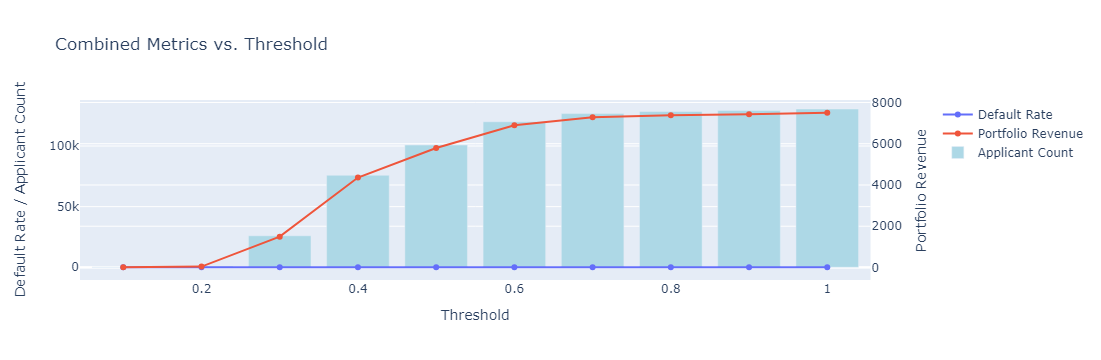

In [118]:
from plotly.subplots import make_subplots

def plot_combined_metrics(df):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(go.Scatter(x=df['Threshold'], y=df['Default Rate'], name="Default Rate"), secondary_y=False)
    fig.add_trace(go.Scatter(x=df['Threshold'], y=df['Portfolio Revenue'], name="Portfolio Revenue"), secondary_y=True)
    fig.add_trace(go.Bar(x=df['Threshold'], y=df['Applicant Count'], name="Applicant Count", marker_color='lightblue'), secondary_y=False)

    # Add figure title
    fig.update_layout(title_text="Combined Metrics vs. Threshold",
                     height=600)

    # Set x-axis title
    fig.update_xaxes(title_text="Threshold")

    # Set y-axes titles
    fig.update_yaxes(title_text="Default Rate / Applicant Count", secondary_y=False)
    fig.update_yaxes(title_text="Portfolio Revenue", secondary_y=True)

    fig.show()



plot_combined_metrics(results_df)

## Test 1

In [109]:
# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018)
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
date_feature_test1 = pd.to_datetime(df3['S_2'])  # Convert to datetime if not already
filtered_data_test1 = df3[(date_feature_test1 >= start_date) & (date_feature_test1 <= end_date)]
average_spend_test1 = filtered_data_test1['S_3'].mean()
average_balance_test1 = filtered_data_test1['B_10'].mean()

# Calculate the monthly revenue for 1 customer based on test1 data
monthly_revenue_test1 = average_balance_test1 * 0.02 + average_spend_test1 * 0.001

# Calculate the expected annual revenue over the next 12 months based on test1 data
expected_revenue_test1 = monthly_revenue_test1 * 12

# Get predicted probabilities for the test1 dataset using your TensorFlow model
nn_probs_test1_flat = nn_final.predict(X_test1).flatten()

# Initialize an empty list to store dictionaries of results for test1 data
results_test1 = []

for threshold in thresholds:
    # Determine accepted applicants based on the threshold for test1 data
    accepted_indices_test1 = nn_probs_test1_flat < threshold
    total_applicants_test1 = np.sum(accepted_indices_test1)
    defaulted_applicants_test1 = np.sum(y_test1[accepted_indices_test1])

    # Avoid division by zero
    default_rate_test1 = defaulted_applicants_test1 / total_applicants_test1 if total_applicants_test1 > 0 else 0
    
    # Calculate the portfolio revenue for test1 data
    portfolio_revenue_value_test1 = expected_revenue_test1 * total_applicants_test1

    # Append a dictionary of results for this threshold for test1 data
    results_test1.append({
        'Threshold': threshold,
        'Default Rate': default_rate_test1,
        'Portfolio Revenue': portfolio_revenue_value_test1,
        'Applicant Count': total_applicants_test1
    })

# Convert the list of dictionaries to a DataFrame for test1 data
results_df_test1 = pd.DataFrame(results_test1)

# Display the DataFrame for test1 data
results_df_test1

3599/3599 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step


,Threshold,Default Rate,Portfolio Revenue,Applicant Count
0,0.1,0.314286,2.011125,35
1,0.2,0.132911,9.078793,158
2,0.3,0.012256,323.503823,5630
3,0.4,0.038199,935.632815,16283
4,0.5,0.110537,1246.552741,21694
5,0.6,0.198991,1481.337221,25780
6,0.7,0.235149,1565.114943,27238
7,0.8,0.244901,1586.088103,27603
8,0.9,0.249721,1596.890718,27791
9,1.0,0.256587,1613.726707,28084


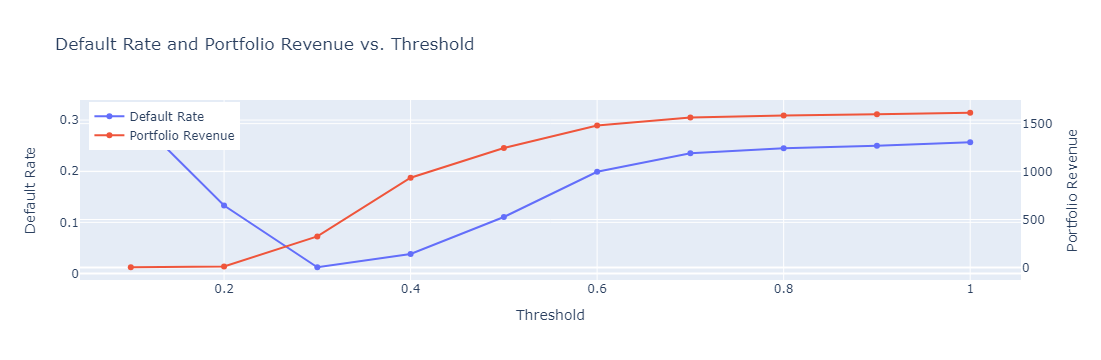

In [119]:
plot_default_rate_and_revenue_vs_threshold(results_df_test1)

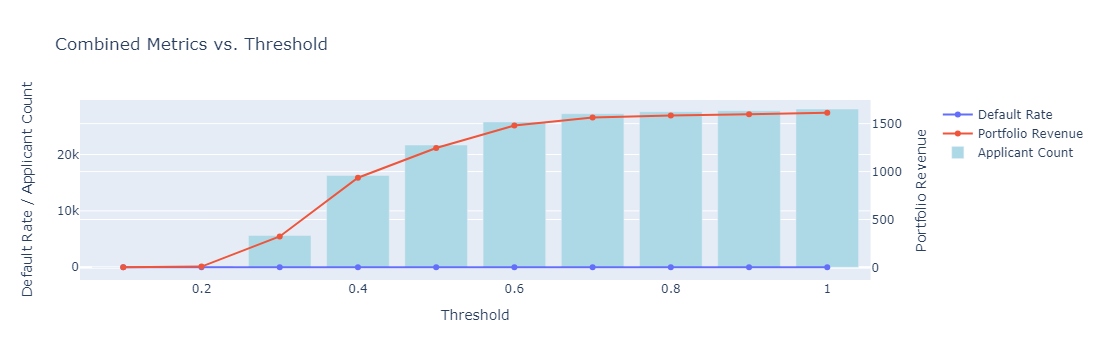

In [120]:
plot_combined_metrics(results_df_test1)

## Test 2

In [110]:
# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018)
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
date_feature_test2 = pd.to_datetime(df3['S_2'])  # Convert to datetime if not already
filtered_data_test2 = df3[(date_feature_test2 >= start_date) & (date_feature_test2 <= end_date)]
average_spend_test2 = filtered_data_test2['S_3'].mean()
average_balance_test2 = filtered_data_test2['B_10'].mean()

# Calculate the monthly revenue for 1 customer based on test2 data
monthly_revenue_test2 = average_balance_test2 * 0.02 + average_spend_test2 * 0.001

# Calculate the expected annual revenue over the next 12 months based on test2 data
expected_revenue_test2 = monthly_revenue_test2 * 12

# Get predicted probabilities for the test2 dataset using your TensorFlow model
nn_probs_test2_flat = nn_final.predict(X_test2).flatten()

# Initialize an empty list to store dictionaries of results for test2 data
results_test2 = []

for threshold in thresholds:
    # Determine accepted applicants based on the threshold for test2 data
    accepted_indices_test2 = nn_probs_test2_flat < threshold
    total_applicants_test2 = np.sum(accepted_indices_test2)
    defaulted_applicants_test2 = np.sum(y_test2[accepted_indices_test2])

    # Avoid division by zero
    default_rate_test2 = defaulted_applicants_test2 / total_applicants_test2 if total_applicants_test2 > 0 else 0
    
    # Calculate the portfolio revenue for test2 data
    portfolio_revenue_value_test2 = expected_revenue_test2 * total_applicants_test2

    # Append a dictionary of results for this threshold for test2 data
    results_test2.append({
        'Threshold': threshold,
        'Default Rate': default_rate_test2,
        'Portfolio Revenue': portfolio_revenue_value_test2,
        'Applicant Count': total_applicants_test2
    })

# Convert the list of dictionaries to a DataFrame for test2 data
results_df_test2 = pd.DataFrame(results_test2)

# Display the DataFrame for test2 data
results_df_test2


3599/3599 ━━━━━━━━━━━━━━━━━━━━ 3s 694us/step


,Threshold,Default Rate,Portfolio Revenue,Applicant Count
0,0.1,0.215686,2.930496,51
1,0.2,0.141935,8.906411,155
2,0.3,0.011758,322.526991,5613
3,0.4,0.041615,929.254675,16172
4,0.5,0.117014,1239.427613,21570
5,0.6,0.206836,1480.992456,25774
6,0.7,0.241552,1562.644132,27195
7,0.8,0.251034,1583.962057,27566
8,0.9,0.255873,1594.879593,27756
9,1.0,0.261905,1609.704457,28014


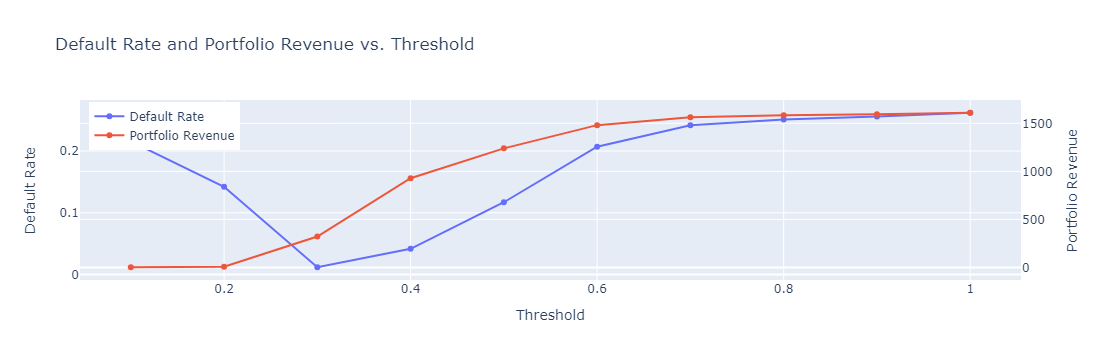

In [121]:
plot_default_rate_and_revenue_vs_threshold(results_df_test2)

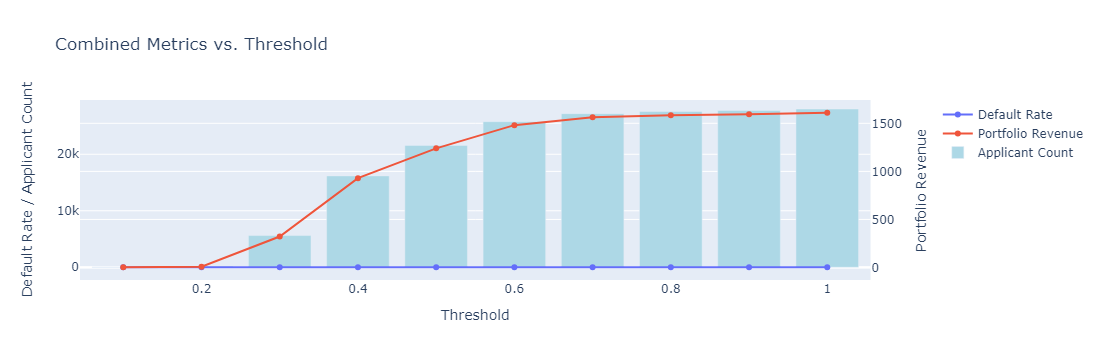

In [122]:
plot_combined_metrics(results_df_test2)